# The Exploring of Target Kinases and Chemical Space of Inhibitors for the Pharmaceutical Industry and Academia.


## Backgrounds

**Protein kinases** are among the most important classes of therapeutic targets of cancer because of their major roles in cell signaling pathways. Obtaining **kinase inhibitor** selectivity is important in pharmacology and clinical research.  In other words, the inhibitor targeting specific kinase is more valuable than others due to they have the less side effect. Many pharmaceutical companies and academia have been trying to find candidate drugs for the development of new inhibitors for cancer treatment, and the cost of clinical trials and experiments are immense level.

## Goals
In this project, we will suggest the beneficial target kinases with high selectivity and the model for obtaining candidate properties of inhibitors targeting few kinases and multi-targeted kinase inhibitors. This model would be helpful in reducing the cost of finding novel drugs for cancer therapy.



## Data Source
1. **Kinase-compound activity dataset**: Anastassiadis, Theonie, et al. "Comprehensive assay of kinase catalytic activity reveals features of kinase inhibitor selectivity." Nature biotechnology 29.11 (2011): 1039. (https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3230241/, Supplementary table 3: Excel table of the complete pairwise kinase-compound activity dataset)
    - **How to obtain**: Downloadable from Pubmed Central
    - **Contents**: The dataset includes 300 kinase activities with respect to 178 kinase inhibitors.
    - **Scale**: Percent(%) remaining kinase activity in the presence of the compound relative to solvent control. (the less score is the better inhibition.)
   
   
2. Chemical property dataset: Pubchem (https://pubchem.ncbi.nlm.nih.gov)
    - **How to obtain**: PubChemPy library (https://pubchempy.readthedocs.io/en/latest/) provides a way to interact with PubChem in Python. It allows chemical searches by name, substructure and similarity, chemical standardization, conversion between chemical file formats, depiction and retrieval of chemical properties.
    - **Contents**: The available properties are: MolecularFormula, MolecularWeight, CanonicalSMILES, IsomericSMILES, InChI, InChIKey, IUPACName, XLogP, ExactMass, MonoisotopicMass, TPSA, Complexity, Charge, HBondDonorCount, HBondAcceptorCount, RotatableBondCount, HeavyAtomCount, IsotopeAtomCount, AtomStereoCount, DefinedAtomStereoCount, UndefinedAtomStereoCount, BondStereoCount, DefinedBondStereoCount, UndefinedBondStereoCount, CovalentUnitCount, Volume3D, XStericQuadrupole3D, YStericQuadrupole3D, ZStericQuadrupole3D, FeatureCount3D, FeatureAcceptorCount3D, FeatureDonorCount3D, FeatureAnionCount3D, FeatureCationCount3D, FeatureRingCount3D, FeatureHydrophobeCount3D, ConformerModelRMSD3D, EffectiveRotorCount3D, ConformerCount3D. 


3. Kinase family and group dataset: (http://kinase.com)
    - **How to obtain**: Downloadable the group annotation file from http://kinase.com
    - Pre-processed file: **annotaion.txt**


4. Official gene symbol dataset: (http://tanlab.ucdenver.edu/KIEO/KIEOv1.0)
    - **How to obtain**:  They provide the official gene symbol information with respect to kinases used in this dataset.
    - Pre-processed file: **group_annotaion.txt**

# Data Download & Wrangling

In [1]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
%matplotlib inline
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

## Load Main Data

In [2]:
# Read inhibition file
df = pd.read_excel("NIHMS328213-supplement-3.xls", header = 1)
df.head()

,compound name:,ATM Kinase Inhibitor,ATM/ATR Kinase Inhibitor,AG 1024,AGL 2043,Akt Inhibitor IV,"Akt Inhibitor V, Triciribine","Akt Inhibitor VIII, Isozyme-Selective, Akti-1/2",Akt Inhibitor X,Alsterpaullone,...,Pazopanib,Roscovitine,Sorafenib,Sunitinib,Tandutinib,Tofacitinib,Tozasertib,Vandetanib,Vatalanib,VX-702
0,compound CAS#:,587871-26-9,905973-89-9,65678-07-1,226717-28-8,681281-88-9,35943-35-2,612847-09-3,925681-41-0,237430-03-4,...,444731-52-6,186692-46-6,284461-73-0,557795-19-4,387867-13-2,477600-75-2,639089-54-6,443913-73-3,212141-51-0,745833-23-2
1,ABL1,99.5232,101.156,59.8285,80.3644,96.7296,99.8549,98.2023,106.989,57.654,...,63.6976,102.203,90.4338,47.2421,103.992,100.919,13.7559,11.7372,96.5188,99.6706
2,ABL2/ARG,92.0036,104.834,57.1171,100.18,95.7446,101.81,96.7736,100.752,54.5966,...,38.4726,100.254,99.3726,61.7791,96.9872,90.5074,5.74523,14.0096,100.626,100.005
3,ACK1,95.6682,97.9587,93.1229,99.9833,97.9952,92.5072,92.2874,94.651,74.8538,...,90.165,96.6755,97.6022,64.1103,92.6873,87.0744,66.4266,85.3733,91.6597,96.1037
4,AKT1,113.076,117.843,108.238,114.351,103.93,108.227,114.147,112.045,107.279,...,91.1726,90.3476,96.1685,104.829,102.414,90.2666,99.1938,94.704,102.973,84.7189


## Data Cleaning for Kinase Inhibitors Nomenclature

In [3]:
# Make a dataframe for inbihitors
inhibitors = pd.DataFrame(pd.Series(df.iloc[0]))
inhibitors = inhibitors.reset_index()
inhibitors.columns = ['Name', 'CAS']
inhibitors = inhibitors.drop(0)
inhibitors.head()

,Name,CAS
1,ATM Kinase Inhibitor,587871-26-9
2,ATM/ATR Kinase Inhibitor,905973-89-9
3,AG 1024,65678-07-1
4,AGL 2043,226717-28-8
5,Akt Inhibitor IV,681281-88-9


In [4]:
# Make a function to get Pubchem identifier based on #CAS identifier and Chemical Name.
import pubchempy as pcp
def getCID(name):
    name = pcp.get_cids(name , 'name')
    return name

In [5]:
# Get Pubchem identifier to make easy access to Pubchem database.
inhibitors['CID_cas'] = inhibitors['CAS'].apply(getCID)
inhibitors['CID_name'] = inhibitors['Name'].apply(getCID)

In [6]:
inhibitors.head()

,Name,CAS,CID_cas,CID_name
1,ATM Kinase Inhibitor,587871-26-9,[5278396],[5278396]
2,ATM/ATR Kinase Inhibitor,905973-89-9,[6605258],[]
3,AG 1024,65678-07-1,[2044],[2044]
4,AGL 2043,226717-28-8,[9817165],[9817165]
5,Akt Inhibitor IV,681281-88-9,[5719375],[5719375]


In [7]:
inhibitors['CID'] = inhibitors['CID_cas'] + inhibitors['CID_name']
inhibitors['CID'] = inhibitors['CID'].apply(set).apply(sorted)

In [8]:
for i in inhibitors.index:
    try:
        inhibitors['CID'][i] = str(inhibitors['CID'][i][0])
    except:
        inhibitors['CID'][i] = np.nan

In [9]:
inhibitors.head()

,Name,CAS,CID_cas,CID_name,CID
1,ATM Kinase Inhibitor,587871-26-9,[5278396],[5278396],5278396
2,ATM/ATR Kinase Inhibitor,905973-89-9,[6605258],[],6605258
3,AG 1024,65678-07-1,[2044],[2044],2044
4,AGL 2043,226717-28-8,[9817165],[9817165],9817165
5,Akt Inhibitor IV,681281-88-9,[5719375],[5719375],5719375


In [10]:
inhibitors[inhibitors['CID'].isnull()]

,Name,CAS,CID_cas,CID_name,CID
10,Alsterpaullone 2-Cyanoethyl,852527-97-0,[],[],NaN
24,"Cdk1 Inhibitor, CGP74514A",190654-01-4,[],[],NaN


In [11]:
## Input values through manual curation
inhibitors['CID'][10] = '16760286'
inhibitors['CID'][24] = '2794188'

In [12]:
df_inhibitor = inhibitors[['Name','CID']]

In [13]:
df_inhibitor.head()

,Name,CID
1,ATM Kinase Inhibitor,5278396
2,ATM/ATR Kinase Inhibitor,6605258
3,AG 1024,2044
4,AGL 2043,9817165
5,Akt Inhibitor IV,5719375


In [14]:
df_metric = df.drop(0)
df_metric.columns = ['Kinase'] + list(df_inhibitor['CID'])

In [15]:
df_metric.head() 

,Kinase,5278396,6605258,2044,9817165,5719375,65399,135398501,16760284,5005498,...,10113978,160355,216239,5329102,3038522,9926791,5494449,3081361,151194,10341154
1,ABL1,99.5232,101.156,59.8285,80.3644,96.7296,99.8549,98.2023,106.989,57.654,...,63.6976,102.203,90.4338,47.2421,103.992,100.919,13.7559,11.7372,96.5188,99.6706
2,ABL2/ARG,92.0036,104.834,57.1171,100.18,95.7446,101.81,96.7736,100.752,54.5966,...,38.4726,100.254,99.3726,61.7791,96.9872,90.5074,5.74523,14.0096,100.626,100.005
3,ACK1,95.6682,97.9587,93.1229,99.9833,97.9952,92.5072,92.2874,94.651,74.8538,...,90.165,96.6755,97.6022,64.1103,92.6873,87.0744,66.4266,85.3733,91.6597,96.1037
4,AKT1,113.076,117.843,108.238,114.351,103.93,108.227,114.147,112.045,107.279,...,91.1726,90.3476,96.1685,104.829,102.414,90.2666,99.1938,94.704,102.973,84.7189
5,AKT2,96.0365,91.566,97.7107,91.5002,99.6321,107.11,96.7915,100.685,101.439,...,107.137,102.006,102.648,87.3601,97.91,98.0253,103.226,110.184,103.994,118.276


## Data Cleaning for Kinases Nomenclature

In [16]:
## Make official gene symbol dictionary
annoDic = {}
filetxt = open('annotation.txt','r')
readLine = filetxt.readline()
readLine = filetxt.readline()
while readLine :
    readLine = readLine.replace('\n','')
    readLine = readLine.split('\t')
    annoDic[readLine[1]] = readLine[0]
    readLine = filetxt.readline()

In [17]:
df_metric['Kinase_official'] = df_metric['Kinase'].apply(lambda x:annoDic[x])

In [18]:
## Make kinase group dictionary
groupDic = {}
filetxt = open('group_annotation.txt','r')
readLine = filetxt.readline()
readLine = filetxt.readline()
while readLine :
    readLine = readLine.replace('\n','')
    readLine = readLine.split('\t')
    groupDic[readLine[0]] = readLine[1]
    readLine = filetxt.readline()

In [19]:
## Add columns for Official kinase symbols and Kinase groups
df_metric['Kinase_group'] = df_metric['Kinase_official'].apply(lambda x:groupDic[x])
df_kinase = df_metric[['Kinase','Kinase_official','Kinase_group']]
df_values = df_metric.drop(['Kinase','Kinase_official','Kinase_group'],axis =1)

In [20]:
df_values.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 300 entries, 1 to 300
Columns: 178 entries, 5278396 to 10341154
dtypes: object(178)
memory usage: 419.5+ KB


In [21]:
## Fill NaN with mean values
df_values = df_values.fillna(df_values.mean())

## Get Cleaned Kinase-compound Activity Dataset

* Columns: inhibitor indentifiers
* Rows: official kinase names 

In [22]:
df_metric = pd.concat([df_kinase, df_values], axis = 1)

In [23]:
# Now we obtained the cleaned dataset.
df_metric.head()

,Kinase,Kinase_official,Kinase_group,5278396,6605258,2044,9817165,5719375,65399,135398501,...,10113978,160355,216239,5329102,3038522,9926791,5494449,3081361,151194,10341154
1,ABL1,ABL1,TK,99.523181,101.156070,59.828521,80.364374,96.729602,99.854936,98.202267,...,63.697560,102.203440,90.433806,47.242063,103.992358,100.918552,13.755904,11.737212,96.518775,99.670558
2,ABL2/ARG,ABL2,TK,92.003595,104.833625,57.117112,100.179730,95.744601,101.810358,96.773605,...,38.472576,100.254267,99.372587,61.779072,96.987201,90.507367,5.745228,14.009564,100.625970,100.004858
3,ACK1,TNK2,TK,95.668218,97.958749,93.122893,99.983316,97.995206,92.507167,92.287431,...,90.165015,96.675470,97.602167,64.110336,92.687278,87.074426,66.426616,85.373276,91.659723,96.103732
4,AKT1,AKT1,AGC,113.075577,117.842860,108.237754,114.350814,103.929535,108.226994,114.147466,...,91.172589,90.347601,96.168540,104.828767,102.414287,90.266579,99.193846,94.703990,102.972800,84.718889
5,AKT2,AKT2,AGC,96.036526,91.566042,97.710727,91.500197,99.632088,107.109725,96.791523,...,107.137395,102.005980,102.648283,87.360113,97.909978,98.025346,103.226246,110.183971,103.994331,118.275569


In [24]:
df_metric.to_csv("kinase_drug_activity.csv") ## Save as the file

## Obtain Chemical Properties from Pubchem using Pubchempy module

In [25]:
# Generate new dataframe to save chemical information
df_target = pd.DataFrame(columns=['Chemical', 'Target_group'])

In [26]:
for chemical in df_values.columns :
    minumun = ''
    for i in range(len(df_metric.index)):
        # Get the target kinases with respect to each inhibitor by using the minimum value of the activity
        if df_metric.iloc[i][chemical] == df_metric[chemical].min():
            df_target = df_target.append({'Chemical': chemical, 'Target_group':df_metric.iloc[i]['Kinase_group']}, ignore_index=True)

In [27]:
df_target.head()

,Chemical,Target_group
0,5278396,CAMK
1,6605258,AGC
2,2044,TKL
3,9817165,TK
4,5719375,CAMK


In [28]:
# List of Avaliable Propertis in PubchemPy
properties = ['MolecularFormula', 'MolecularWeight', 'CanonicalSMILES', \
              'IsomericSMILES', 'InChI', 'InChIKey', 'IUPACName', 'XLogP', \
              'ExactMass', 'MonoisotopicMass', 'TPSA', 'Complexity', 'Charge', \
              'HBondDonorCount', 'HBondAcceptorCount', 'RotatableBondCount', \
              'HeavyAtomCount', 'IsotopeAtomCount', 'AtomStereoCount', \
              'DefinedAtomStereoCount', 'UndefinedAtomStereoCount', 'BondStereoCount', \
              'DefinedBondStereoCount', 'UndefinedBondStereoCount', 'CovalentUnitCount',\
              'Volume3D', 'XStericQuadrupole3D', 'YStericQuadrupole3D', 'ZStericQuadrupole3D', \
              'FeatureCount3D', 'FeatureAcceptorCount3D', 'FeatureDonorCount3D', \
              'FeatureAnionCount3D', 'FeatureCationCount3D', 'FeatureRingCount3D', \
              'FeatureHydrophobeCount3D', 'ConformerModelRMSD3D', 'EffectiveRotorCount3D', 'ConformerCount3D']

In [29]:
df_property = pd.DataFrame()
for cid in df_target['Chemical']:
    c = pcp.get_properties(properties, cid, as_dataframe=True) # get properties from pubChem database
    df_property = df_property.append(c)

In [30]:
df_property = df_property.fillna(df_property.median())

In [31]:
df_property.head()

,AtomStereoCount,BondStereoCount,CanonicalSMILES,Charge,Complexity,ConformerCount3D,ConformerModelRMSD3D,CovalentUnitCount,DefinedAtomStereoCount,DefinedBondStereoCount,...,MonoisotopicMass,RotatableBondCount,TPSA,UndefinedAtomStereoCount,UndefinedBondStereoCount,Volume3D,XLogP,XStericQuadrupole3D,YStericQuadrupole3D,ZStericQuadrupole3D
CID,,,,,,,,,,,,,,,,,,,,,
5278396,0,0,C1COCCN1C2=CC(=O)C=C(O2)C3=C4C(=CC=C3)SC5=CC=C...,0,643,10,0.8,1,0,0,...,395.064986,2,89.4,0,0,296.6,3.9,10.78,4.41,2.16
6605258,1,0,C1=CC=C(C=C1)C(C2=CC=CC=C2)C(=O)NC(C(Cl)(Cl)Cl...,0,725,10,1.2,1,0,0,...,554.014923,6,131.0,1,0,396.3,6.1,13.11,6.69,1.88
2044,0,0,CC(C)(C)C1=C(C(=CC(=C1)C=C(C#N)C#N)Br)O,0,414,6,0.6,1,0,0,...,304.021130,2,67.8,0,0,211.8,4.0,7.52,3.08,1.32
9817165,0,0,CC1=NC2=C(N1C)C=C3C(=C2)N=C(C=N3)C4=CC=CS4,0,366,2,0.6,1,0,0,...,280.078268,1,71.8,0,0,214.0,2.5,13.48,1.89,0.66
5719375,0,1,CC[N+]1=C(N(C2=C1C=C(C=C2)C3=NC4=CC=CC=C4S3)C5...,0,732,0,0.8,2,0,1,...,614.100110,6,53.2,0,0,258.3,3.3,12.01,3.08,1.21


## Generate Target Variable with Inhibitiro Activity

* Variable "Activity"
    - 0: selective inhibitors, if the inhibitors target less than three kinds of groups.
    - 1: active inhibitors, if the inhibitors target more than three kinds of groups.

In [32]:
df_kinase = df_metric.drop(['Kinase','Kinase_group'], axis = 1)
df_kinase = df_kinase.set_index('Kinase_official')

In [33]:
df_target_group = pd.DataFrame(columns = ['CID', 'target_group', 'target_group_num'])

In [34]:
# Generate the columns of the number of target groups with respect to each inhibitor.
for column in df_kinase.columns :
    df_target_group = df_target_group.append({'CID': column, 'target_group': df_metric[df_metric[column] < 50]['Kinase_group'].unique() ,'target_group_num': len(df_metric[df_metric[column] < 50]['Kinase_group'].unique())}, ignore_index=True)

In [35]:
df_target_group['target_group_num'] = df_target_group['target_group_num'].astype('int64')
df_selected = pd.DataFrame(columns=['CID', 'Activity'])
df_selected['CID'] = df_target_group['CID']

In [36]:
def a(b):
    if b <= 2 :
        return(0) # selective kinase
    else:
        return(1) # active kinase
df_selected['Activity'] = df_target_group['target_group_num'].apply(a)

In [37]:
df_selected.head()

,CID,Activity
0,5278396,0
1,6605258,0
2,2044,0
3,9817165,0
4,5719375,0


In [38]:
print("The number of Selective Inhibitors is {}".format(df_selected[df_selected['Activity'] == 0].shape[0]))
print("The number of Active Inhibitors is {}".format(df_selected[df_selected['Activity'] == 1].shape[0]))

The number of Selective Inhibitors is 90
The number of Active Inhibitors is 88


## Chemical Data exploration

In [39]:
df_prop = pd.read_csv("properties_fill.csv")
df_prop['CID'] = df_prop['CID'].astype('object')
df_prop.head()

,CID,AtomStereoCount,BondStereoCount,CanonicalSMILES,Charge,Complexity,ConformerCount3D,ConformerModelRMSD3D,CovalentUnitCount,DefinedAtomStereoCount,...,MonoisotopicMass,RotatableBondCount,TPSA,UndefinedAtomStereoCount,UndefinedBondStereoCount,Volume3D,XLogP,XStericQuadrupole3D,YStericQuadrupole3D,ZStericQuadrupole3D
0,5278396,0,0,C1COCCN1C2=CC(=O)C=C(O2)C3=C4C(=CC=C3)SC5=CC=C...,0,643,10,0.800000,1,0,...,395.064986,2,89.4,0,0,296.60,3.900000,10.780000,4.410000,2.160000
1,6605258,1,0,C1=CC=C(C=C1)C(C2=CC=CC=C2)C(=O)NC(C(Cl)(Cl)Cl...,0,725,10,1.200000,1,0,...,554.014923,6,131.0,1,0,396.30,6.100000,13.110000,6.690000,1.880000
2,2044,0,0,CC(C)(C)C1=C(C(=CC(=C1)C=C(C#N)C#N)Br)O,0,414,6,0.600000,1,0,...,304.021130,2,67.8,0,0,211.80,4.000000,7.520000,3.080000,1.320000
3,9817165,0,0,CC1=NC2=C(N1C)C=C3C(=C2)N=C(C=N3)C4=CC=CS4,0,366,2,0.600000,1,0,...,280.078268,1,71.8,0,0,214.00,2.500000,13.480000,1.890000,0.660000
4,5719375,0,1,CC[N+]1=C(N(C2=C1C=C(C=C2)C3=NC4=CC=CC=C4S3)C5...,0,732,0,0.758025,2,0,...,614.100110,6,53.2,0,0,263.86,3.247647,13.873484,3.584903,1.258065


In [40]:
# Select numeric variables
numeric_columns = df_prop.select_dtypes([np.int64,np.float64]).columns
df_numeric = df_prop[numeric_columns]
df_numeric.describe()

,AtomStereoCount,BondStereoCount,Charge,Complexity,ConformerCount3D,ConformerModelRMSD3D,CovalentUnitCount,DefinedAtomStereoCount,DefinedBondStereoCount,EffectiveRotorCount3D,...,MonoisotopicMass,RotatableBondCount,TPSA,UndefinedAtomStereoCount,UndefinedBondStereoCount,Volume3D,XLogP,XStericQuadrupole3D,YStericQuadrupole3D,ZStericQuadrupole3D
count,178.000000,178.000000,178.0,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,...,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,0.342697,0.224719,0.0,526.337079,7.028090,0.758025,1.056180,0.213483,0.157303,4.679012,...,363.418958,3.949438,80.337640,0.129213,0.067416,263.860000,3.247647,13.873484,3.584903,1.258065
std,1.426337,0.536842,0.0,211.730371,3.899051,0.183417,0.295333,1.275337,0.448447,2.769271,...,100.185361,2.553988,29.785388,0.680761,0.329278,59.801022,1.247198,6.833795,1.568403,0.487381
min,0.000000,0.000000,0.0,211.000000,0.000000,0.400000,1.000000,0.000000,0.000000,0.000000,...,184.063663,0.000000,15.700000,0.000000,0.000000,132.300000,-1.600000,5.580000,1.250000,0.570000
25%,0.000000,0.000000,0.0,401.250000,3.000000,0.600000,1.000000,0.000000,0.000000,2.250000,...,298.088384,2.000000,61.650000,0.000000,0.000000,223.800000,2.600000,9.415000,2.277500,0.952500
50%,0.000000,0.000000,0.0,487.500000,10.000000,0.758025,1.000000,0.000000,0.000000,4.679012,...,355.029628,4.000000,77.800000,0.000000,0.000000,263.860000,3.247647,13.095000,3.555000,1.258065
75%,0.000000,0.000000,0.0,608.000000,10.000000,0.800000,1.000000,0.000000,0.000000,6.150000,...,403.864413,6.000000,94.375000,0.000000,0.000000,293.900000,4.000000,14.700000,4.447500,1.407500
max,15.000000,4.000000,0.0,1760.000000,11.000000,1.400000,4.000000,15.000000,4.000000,14.400000,...,913.555142,11.000000,195.000000,7.000000,3.000000,439.300000,6.100000,48.660000,8.150000,3.820000


In [41]:
numColList = list(df_numeric.columns)

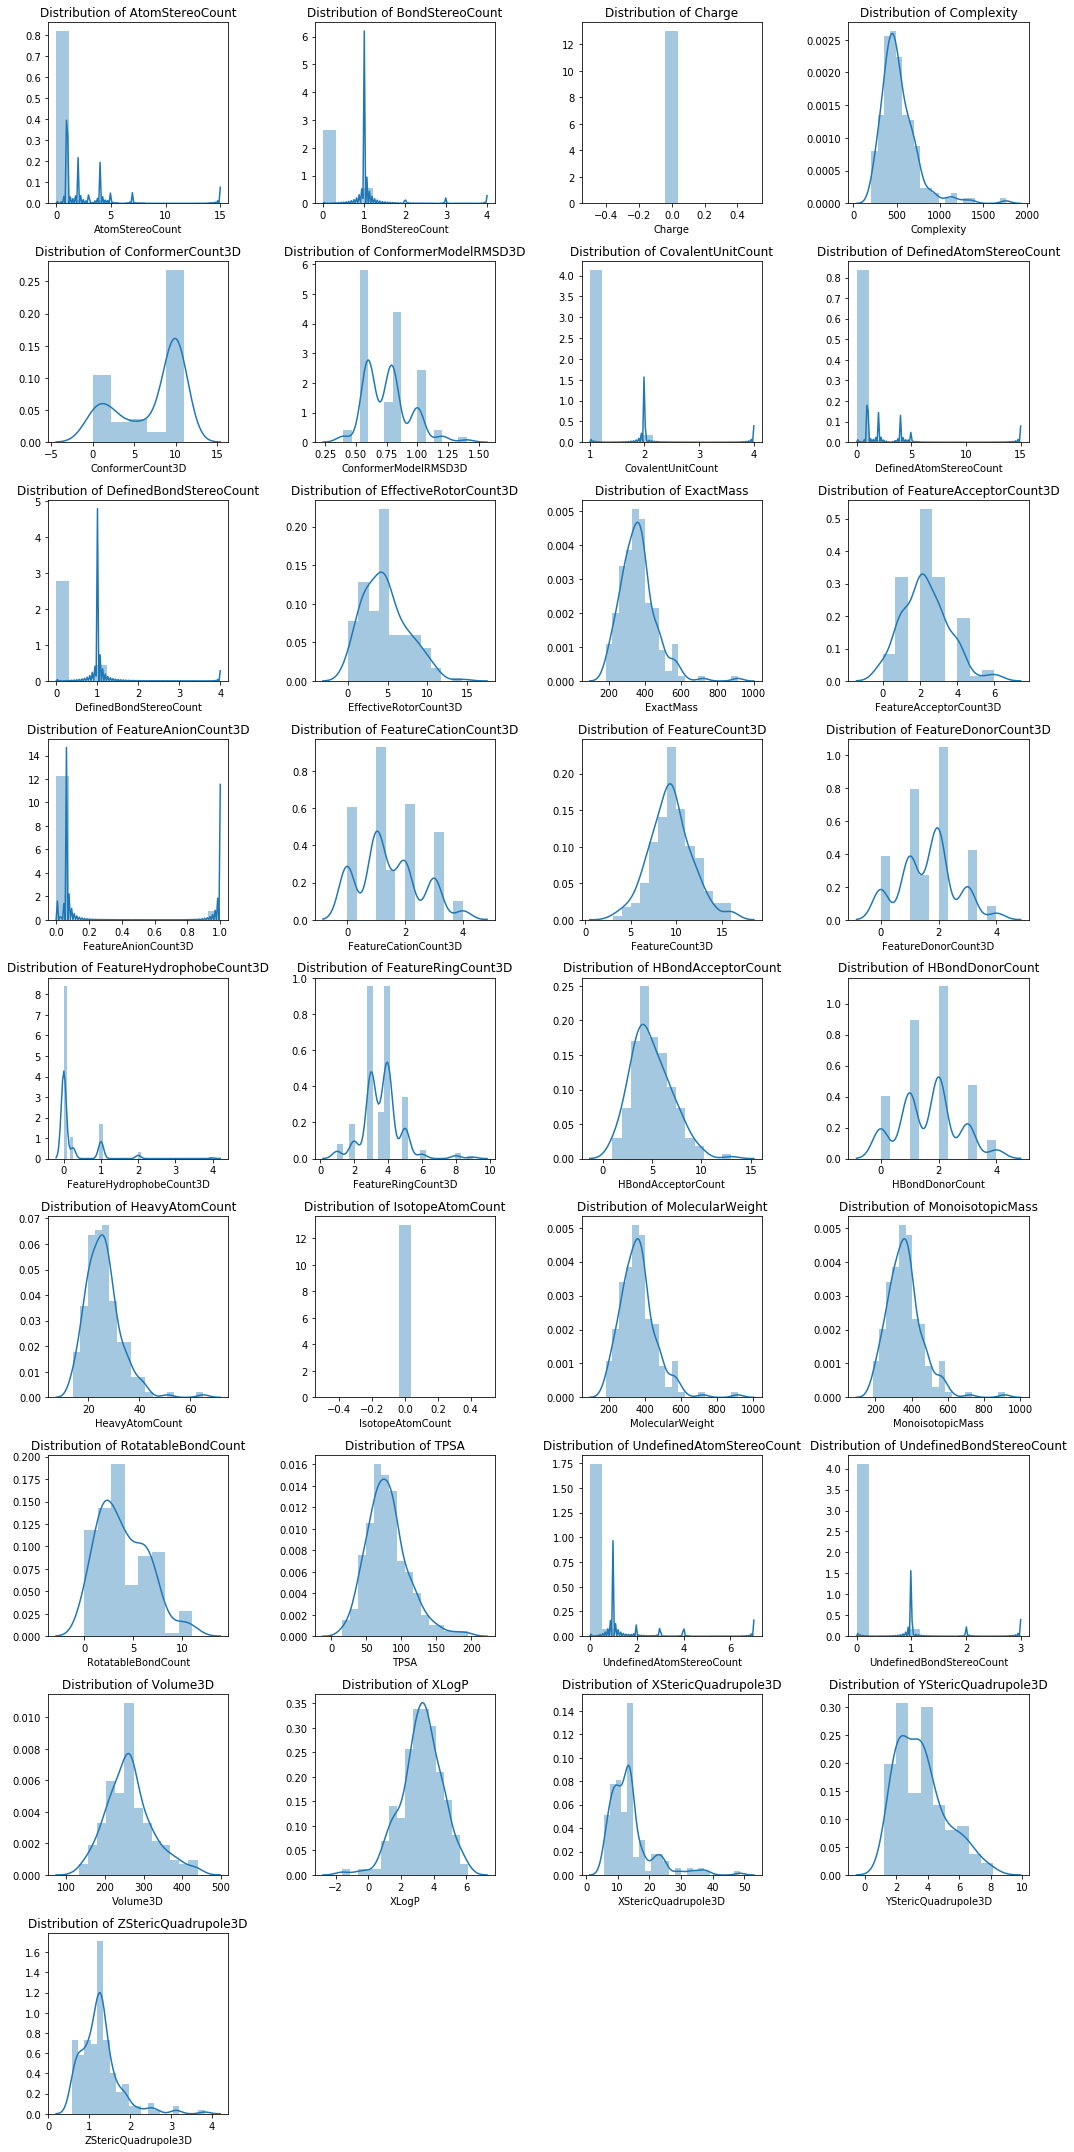

In [42]:
plt.figure(figsize=(15,30))

for i, column in enumerate(numColList):
    plt.subplot(9,4,i+1)
    sns.distplot(df_numeric[column])
    plt.title('Distribution of {}'.format(column))
plt.tight_layout()
plt.show()

Based on the distribution plots, **21 features selected** as they have two-tailed distribution.

In [43]:
chosen_features = ['Complexity',
 'ConformerModelRMSD3D',
 'EffectiveRotorCount3D',
 'ExactMass',
 'FeatureAcceptorCount3D',
 'FeatureCationCount3D',
 'FeatureCount3D',
 'FeatureDonorCount3D',
 'FeatureRingCount3D',
 'HBondAcceptorCount',
 'HBondDonorCount',
 'HeavyAtomCount',
 'MolecularWeight',
 'MonoisotopicMass',
 'RotatableBondCount',
 'TPSA',
 'Volume3D',
 'XLogP',
 'XStericQuadrupole3D',
 'YStericQuadrupole3D',
 'ZStericQuadrupole3D']

# Handling non-normality
## Box-cox transformation

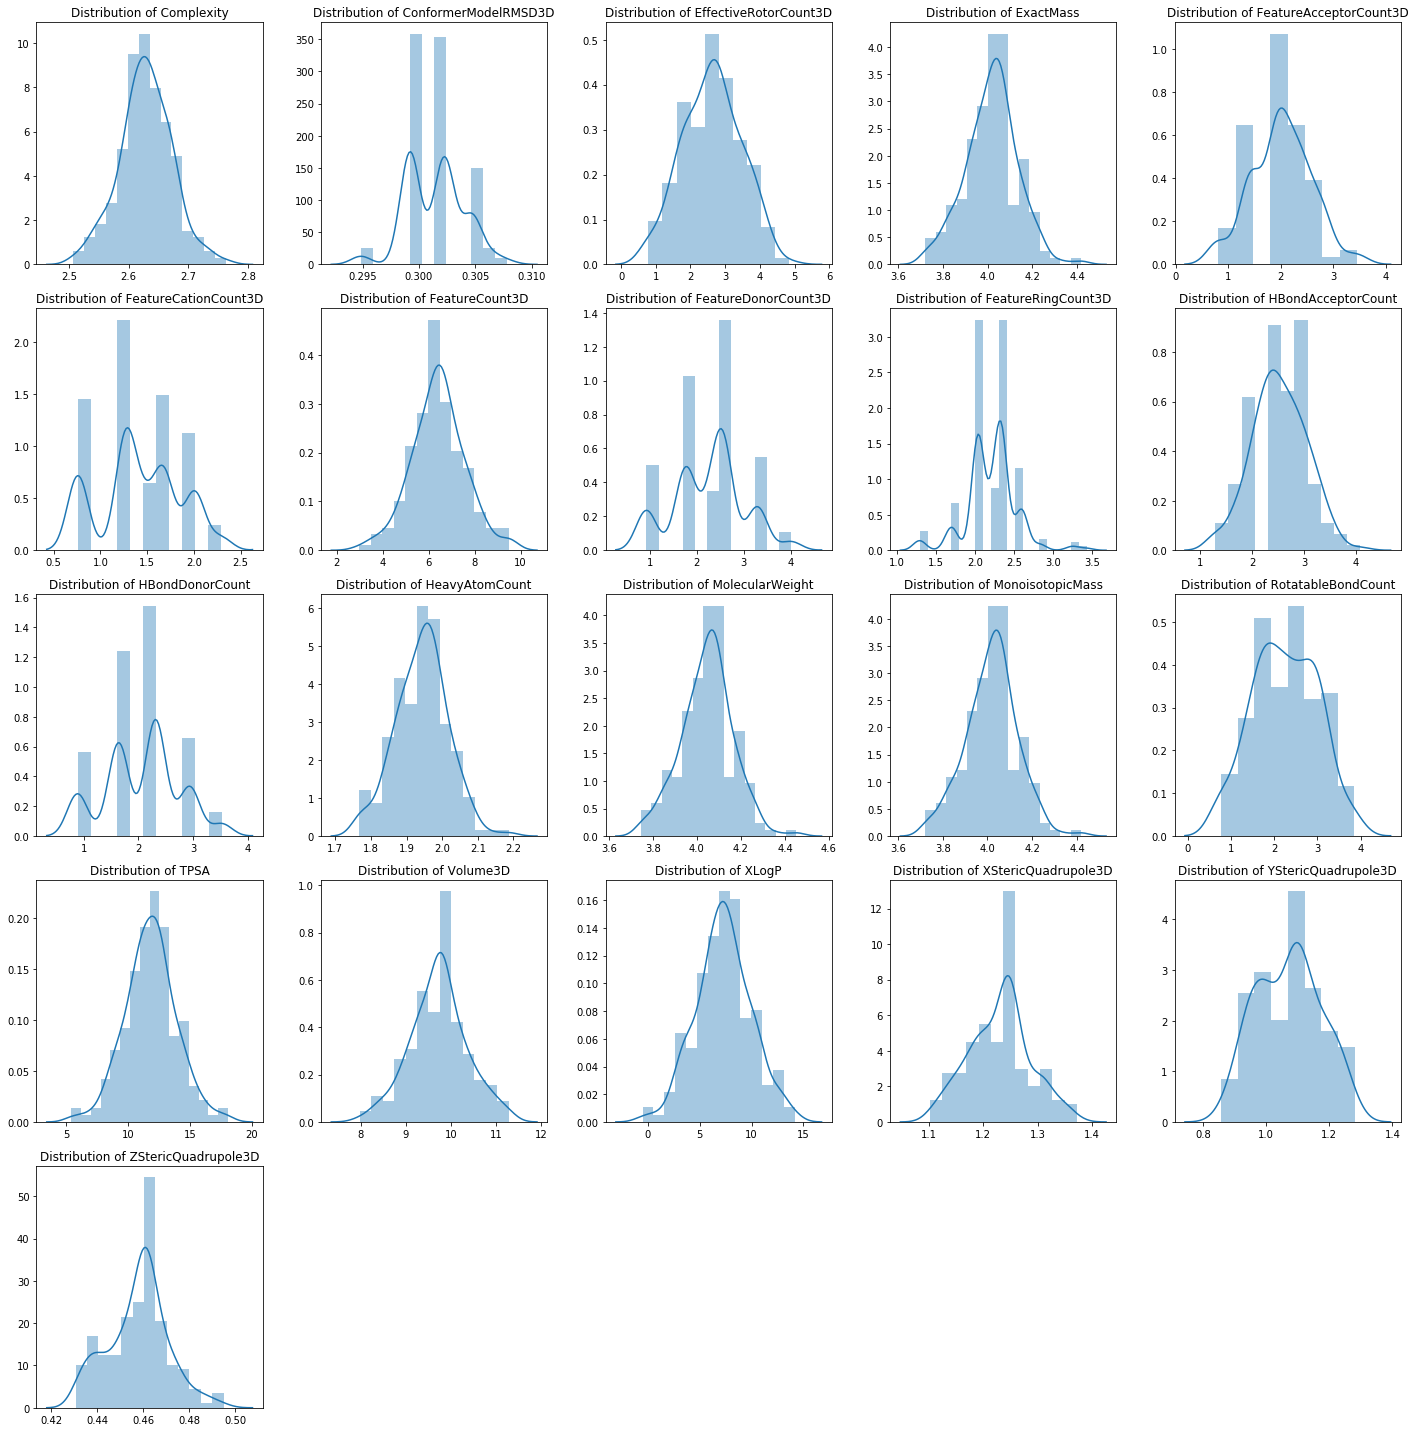

In [44]:
from scipy.stats import boxcox

boxcox_df = pd.DataFrame(columns=chosen_features)
plt.figure(figsize=(20,20))

for i, column in enumerate(chosen_features):
    plt.subplot(5,5,i+1)
    value_boxcox,_ = boxcox(df_numeric[column] + 2)
    sns.distplot(value_boxcox)
    plt.title('Distribution of {}'.format(column))
    boxcox_df[column] = value_boxcox
plt.tight_layout()
plt.show()

## Standardization of the data (Scaling)

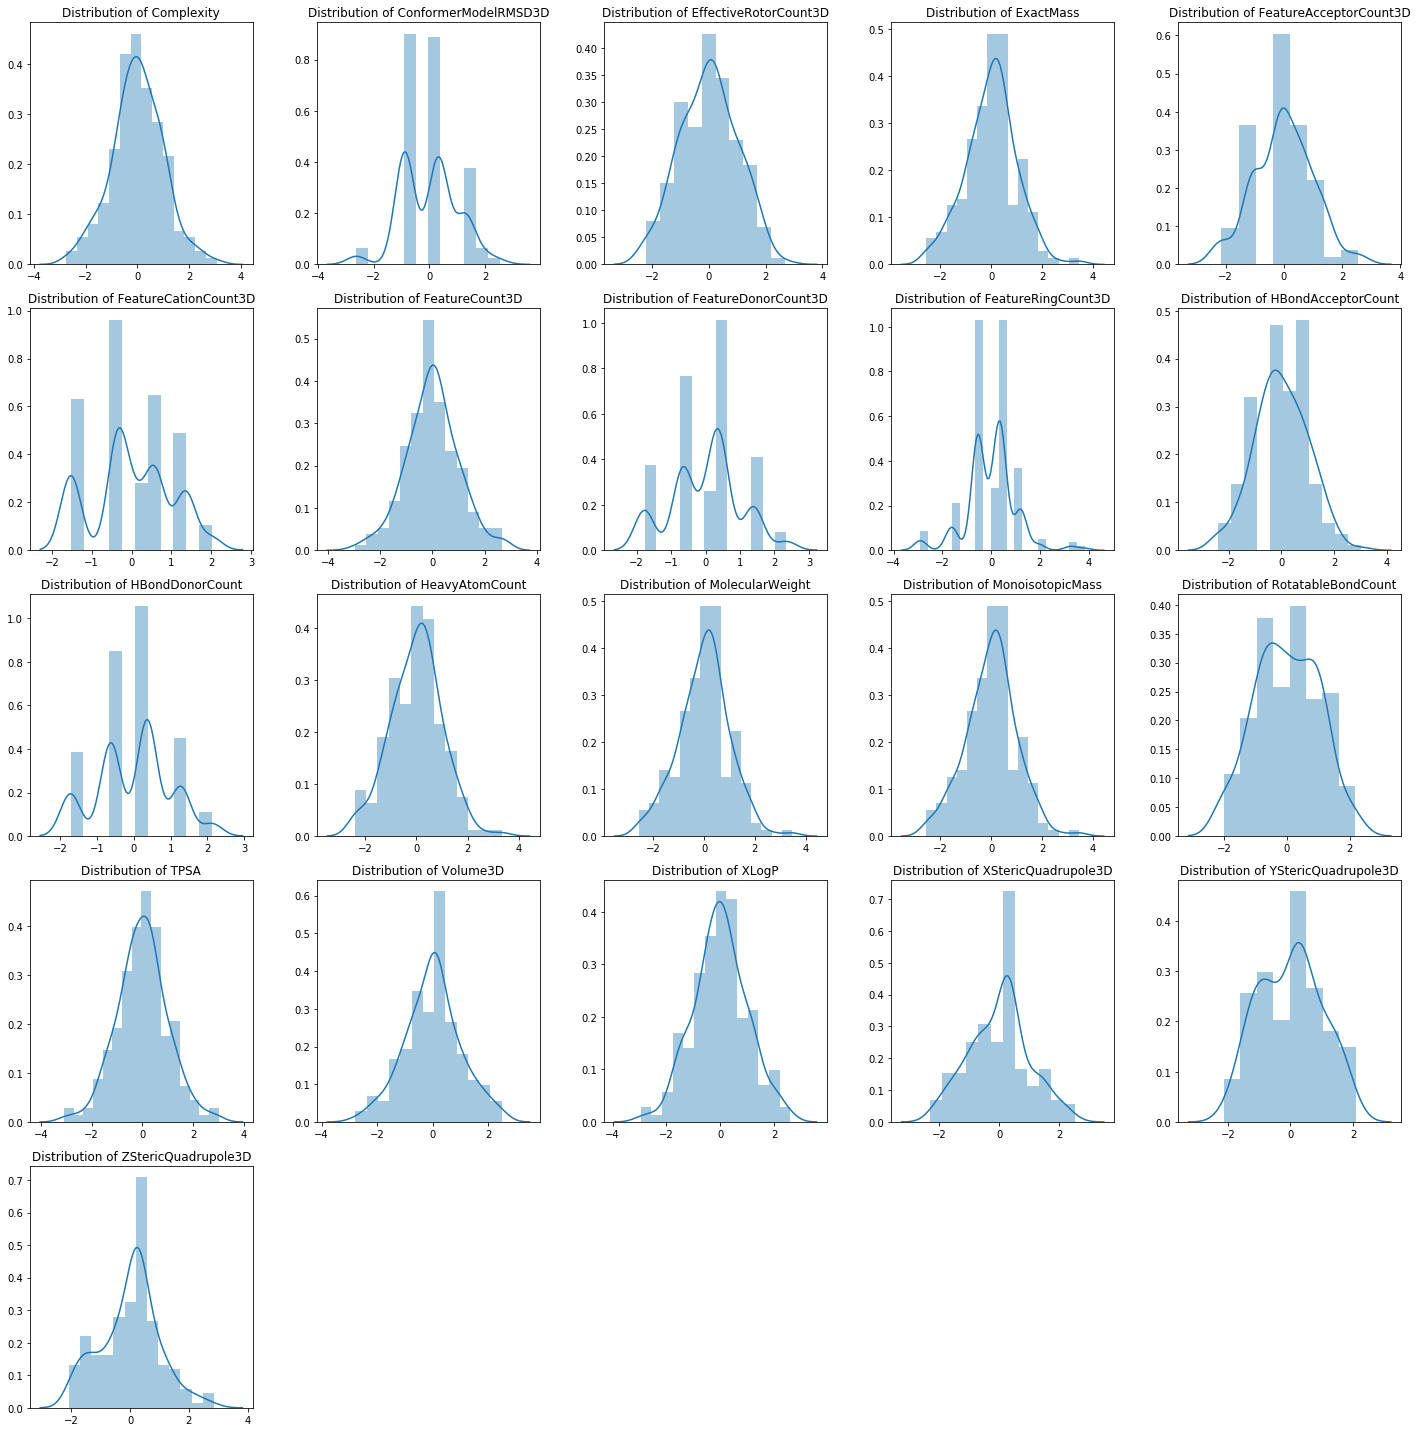

In [45]:
from sklearn.preprocessing import scale
scaled_df = pd.DataFrame(columns=['CID'] + chosen_features)
scaled_df['CID'] = df_prop['CID']
plt.figure(figsize=(20,20))

for i, column in enumerate(boxcox_df):
    plt.subplot(5,5,i+1)
    sns.distplot(scale(np.array(boxcox_df[column])))
    scaled_df[column] = scale(np.array(boxcox_df[column]))
    plt.title('Distribution of {}'.format(column))
plt.tight_layout()
plt.show()

In [46]:
scaled_df.head()

,CID,Complexity,ConformerModelRMSD3D,EffectiveRotorCount3D,ExactMass,FeatureAcceptorCount3D,FeatureCationCount3D,FeatureCount3D,FeatureDonorCount3D,FeatureRingCount3D,...,HeavyAtomCount,MolecularWeight,MonoisotopicMass,RotatableBondCount,TPSA,Volume3D,XLogP,XStericQuadrupole3D,YStericQuadrupole3D,ZStericQuadrupole3D
0,5278396,0.790009,0.369670,-0.274585,0.466097,0.619403,-0.337010,-0.119578,-1.772922,1.212566,...,0.341360,0.465368,0.466360,-0.710684,0.405025,0.617122,0.498276,-0.316475,0.703822,1.691894
1,6605258,1.101064,2.004228,1.933932,1.712755,1.319032,-1.523202,0.717278,1.391544,-0.540369,...,1.312093,1.719975,1.713267,0.864805,1.578044,1.972750,2.597692,0.186937,1.656257,1.338835
2,2044,-0.461399,-0.886109,-0.985212,-0.538796,-0.161804,-1.523202,-1.465530,-0.652592,-2.900934,...,-1.310024,-0.528564,-0.538722,-0.710684,-0.336186,-0.866826,0.586703,-1.352902,-0.144998,0.351044
3,9817165,-0.845022,-0.886109,-1.527839,-0.860629,-0.161804,-0.337010,-1.002622,-1.772922,0.388650,...,-0.865513,-0.861706,-0.860613,-1.274427,-0.189444,-0.822701,-0.662040,0.255045,-1.269880,-1.688968
4,5719375,1.125441,0.137170,0.133534,2.081316,0.079821,0.114316,0.030691,0.026618,0.069752,...,1.511089,2.079616,2.081904,0.864805,-0.919634,0.090793,-0.060869,0.324541,0.214619,0.210003


# Handling outliers

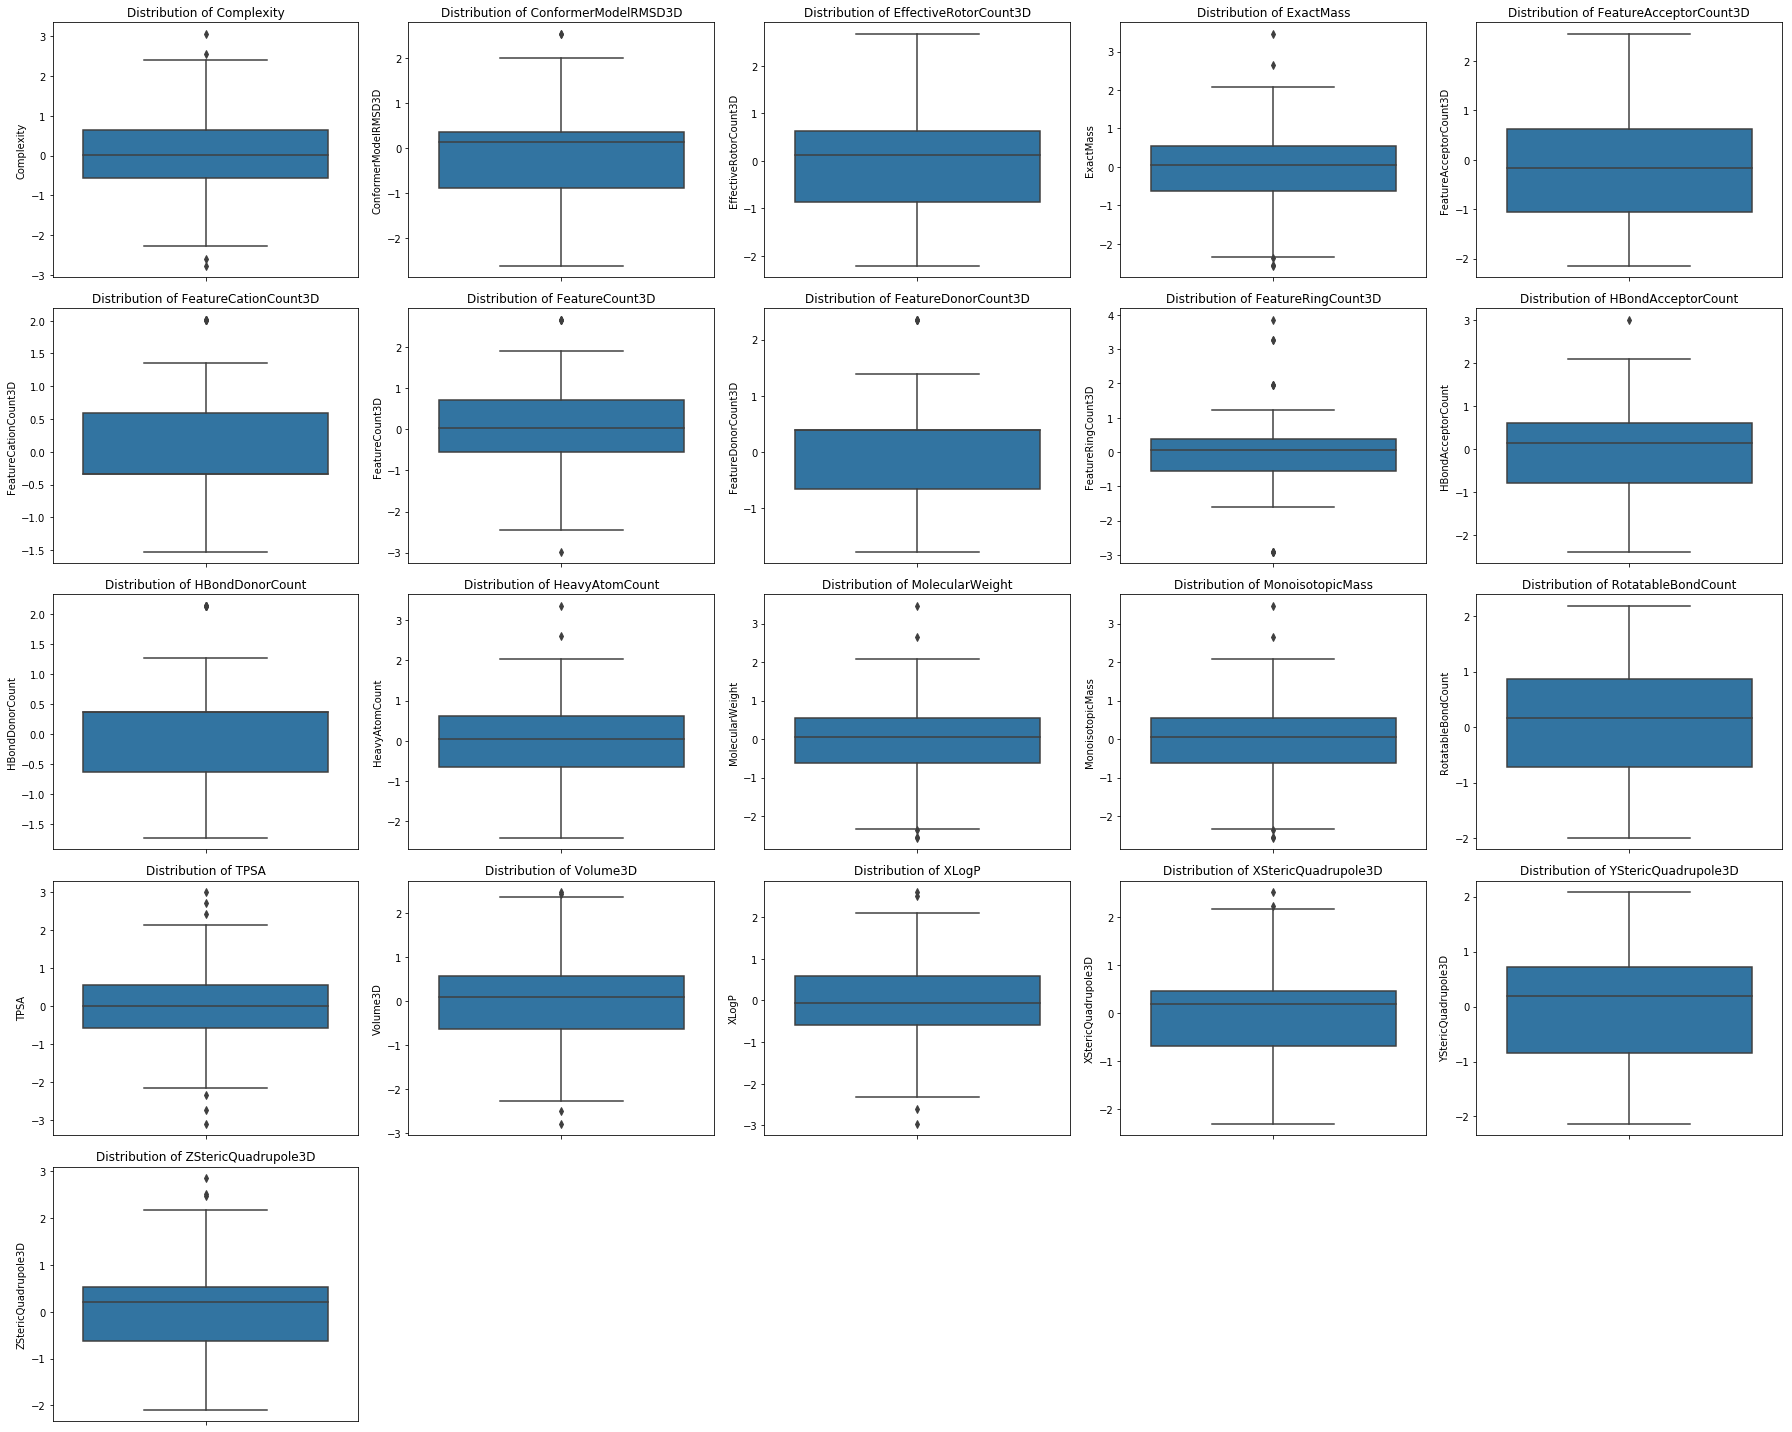

In [47]:
plt.figure(figsize=(25,20))

for i, column in enumerate(chosen_features):
    plt.subplot(5,5,i+1)
    sns.boxplot(scaled_df[column], orient='v')
    plt.title('Distribution of {}'.format(column))
plt.tight_layout()
plt.show()

## Winsorization

In [48]:
# variables with upper outlier
upperList = ['ConformerModelRMSD3D',
             'FeatureCationCount3D',
             'FeatureDonorCount3D', 
             'HBondAcceptorCount',
             'HBondDonorCount',
             'HeavyAtomCount',
             'XStericQuadrupole3D',
             'ZStericQuadrupole3D']

# variables with both side outlier
bothList = ['Complexity',
            'FeatureRingCount3D',
            'ExactMass',
            'FeatureCount3D',
            'MolecularWeight',
            'MonoisotopicMass',
            'XLogP',
            'TPSA',
            'Volume3D']

# variables with no outlier
noList = ['EffectiveRotorCount3D',
          'FeatureAcceptorCount3D',
          'RotatableBondCount',
          'YStericQuadrupole3D']

In [49]:
from scipy.stats.mstats import winsorize
df_winsorized = pd.DataFrame(columns=['CID']+upperList+bothList+noList)
df_winsorized['CID'] = scaled_df['CID']

for i, column in enumerate(upperList):
    winsorize_variable = winsorize(scaled_df[column], (0, 0.10))
    df_winsorized[column] = winsorize_variable

for i, column in enumerate(bothList):
    winsorize_variable = winsorize(scaled_df[column], (0.10, 0.10))
    df_winsorized[column] = winsorize_variable
    
for i, column in enumerate(noList):
    df_winsorized[column] = scaled_df[column]
    

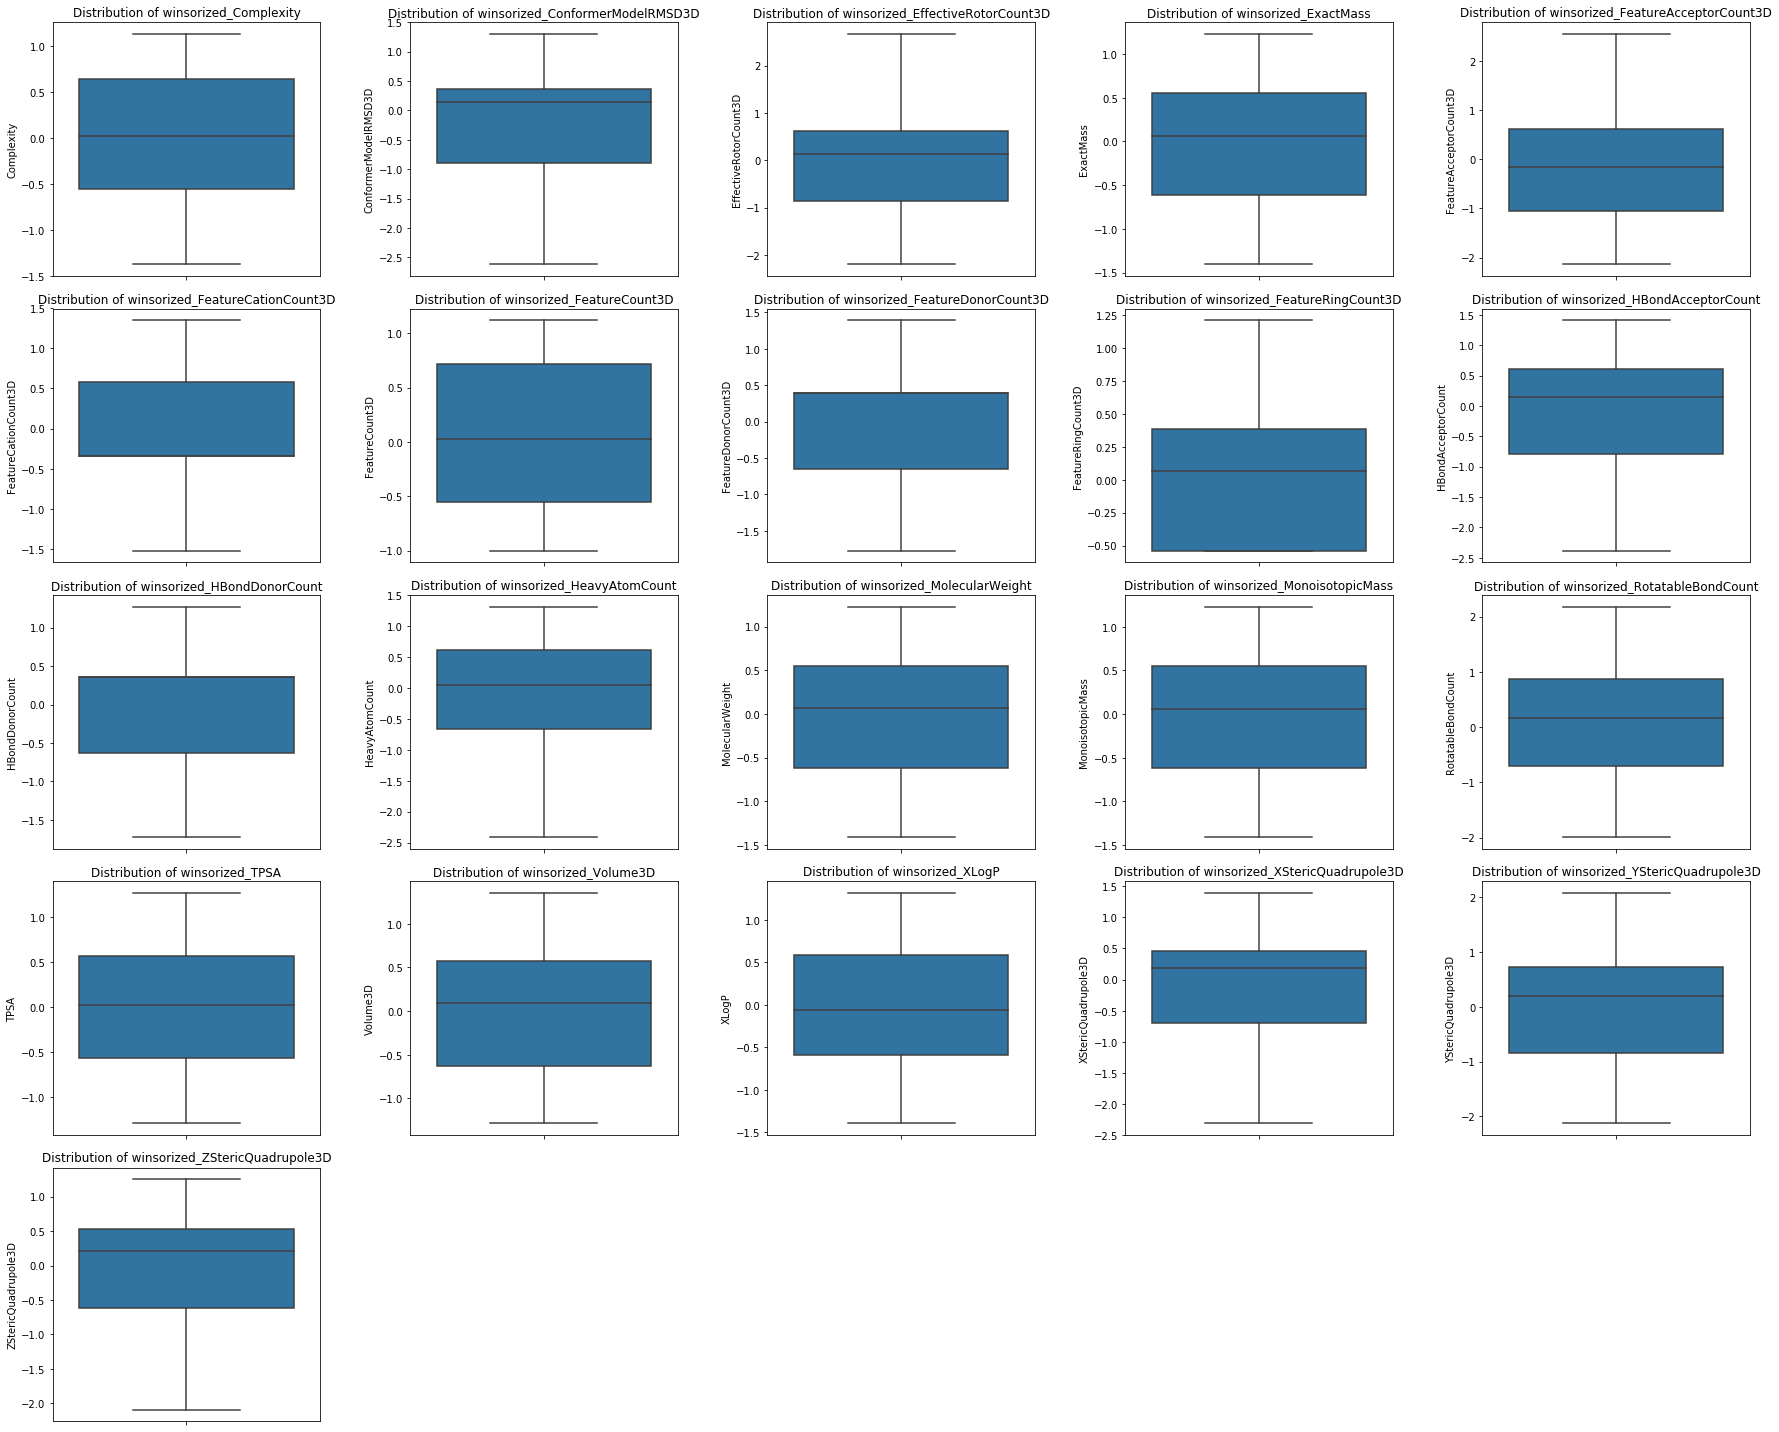

In [50]:
plt.figure(figsize=(25,20))
for i, column in enumerate(chosen_features):
    plt.subplot(5,5,i+1)
    sns.boxplot(df_winsorized[column], orient='v')
    plt.title('Distribution of winsorized_{}'.format(column))

plt.tight_layout()
plt.show()

# Feature Selection

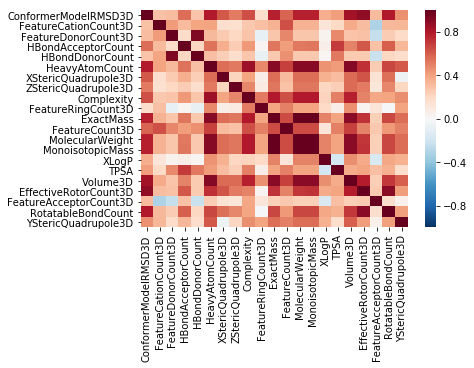

In [51]:
sns.heatmap(df_winsorized.drop('CID', axis=1).corr(), vmin = -1, vmax = 1, cmap="RdBu_r")
plt.show()

The variables related to complexity and molecular weight correlate with each other. I selected relatively independent variables.

Generally, most chemical properties are related to the molecular weights. However, this is the crucial variables in the chemical space. Therefore we will include this variable in our feature.

In [52]:
# Selected relatively independent variables.
chosen_list = ['FeatureCationCount3D',
               'FeatureDonorCount3D',
               'FeatureRingCount3D',
               'FeatureAcceptorCount3D',
               'XLogP',
               'TPSA',
               'MolecularWeight'
              ]

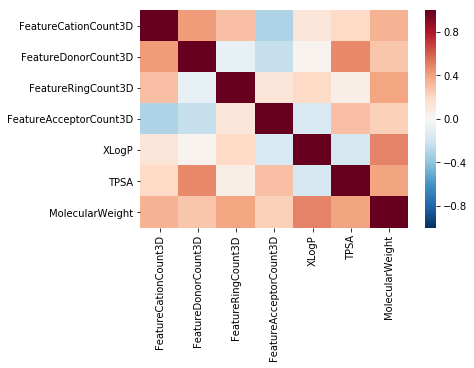

In [53]:
sns.heatmap(df_winsorized[chosen_list].corr(), vmin=-1, vmax=1, cmap="RdBu_r")
plt.show()

In [54]:
df_chosen_feature = df_winsorized[['CID'] + chosen_list]

In [55]:
df_chosen_feature.dtypes

CID                        object
FeatureCationCount3D      float64
FeatureDonorCount3D       float64
FeatureRingCount3D        float64
FeatureAcceptorCount3D    float64
XLogP                     float64
TPSA                      float64
MolecularWeight           float64
dtype: object

In [56]:
df_selected.dtypes

CID         object
Activity     int64
dtype: object

In [57]:
df_chosen_feature.head()

,CID,FeatureCationCount3D,FeatureDonorCount3D,FeatureRingCount3D,FeatureAcceptorCount3D,XLogP,TPSA,MolecularWeight
0,5278396,-0.337010,-1.772922,1.212566,0.619403,0.498276,0.405025,0.465368
1,6605258,-1.523202,1.391544,-0.540369,1.319032,1.318935,1.265625,1.228022
2,2044,-1.523202,-0.652592,-0.540369,-0.161804,0.586703,-0.336186,-0.528564
3,9817165,-0.337010,-1.772922,0.388650,-0.161804,-0.662040,-0.189444,-0.861706
4,5719375,0.114316,0.026618,0.069752,0.079821,-0.060869,-0.919634,1.228022


## Generate Final Feature Table

In [58]:
df_final = pd.concat([df_selected,df_chosen_feature], join='inner', axis=1)

In [59]:
df_final = df_final.drop('CID',axis=1)

# Classification

In [60]:
y = df_final['Activity']
X = df_final.drop('Activity', axis=1)

In [61]:
from sklearn.model_selection import train_test_split
# reserve 25% of holdout groups
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=333)

## KNN Classifiers

In [62]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import precision_recall_fscore_support

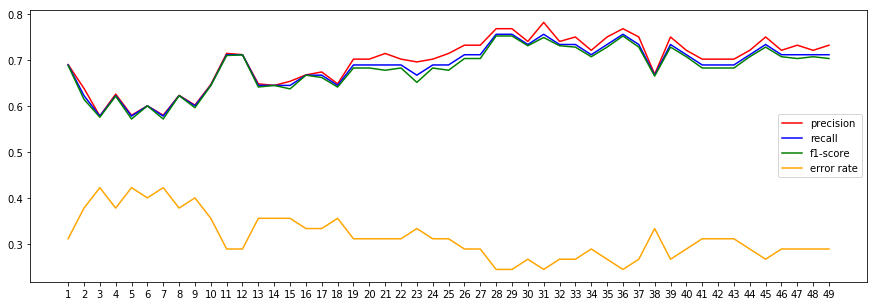

In [63]:
xLine = []
precisions = []
recalls = []
fscores = []
errors = []

for k in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    evaluationScores = precision_recall_fscore_support(y_test, y_pred, average='weighted')
    xLine.append(k)
    precisions.append(evaluationScores[0])
    recalls.append(evaluationScores[1])
    fscores.append(evaluationScores[2])
    errors.append(np.mean(y_pred != y_test))
    
plt.figure(figsize=(15,5))
    
sns.lineplot(x = xLine, y = precisions, color = 'r', label='precision')
sns.lineplot(x = xLine, y = recalls, color = 'b', label='recall')
sns.lineplot(x = xLine, y = fscores, color = 'g', label='f1-score')
sns.lineplot(x = xLine, y = errors, color = 'orange', label='error rate')

plt.xticks(xLine)
plt.tight_layout
plt.show()

In [64]:
knn = KNeighborsClassifier(n_neighbors=31)
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
knn_precision = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
knn_recall = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
knn_f1 = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]

[[13  9]
 [ 2 21]]
              precision    recall  f1-score   support

           0       0.87      0.59      0.70        22
           1       0.70      0.91      0.79        23

    accuracy                           0.76        45
   macro avg       0.78      0.75      0.75        45
weighted avg       0.78      0.76      0.75        45



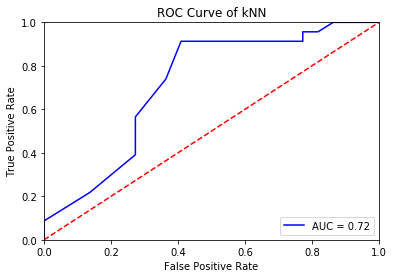

In [65]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
y_scores = knn.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of kNN')
plt.show()

In [66]:
## Insample Cross Validation
knn_cross_val = cross_val_score(knn, X, y, cv=10)
print(knn_cross_val)
## Fluctuate... Overfitting

[0.44444444 0.72222222 0.66666667 0.77777778 0.55555556 0.44444444
 0.55555556 0.72222222 0.47058824 0.58823529]


## Decision Tree Classifier

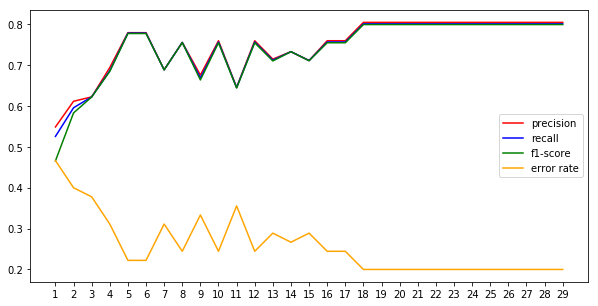

In [67]:
from sklearn.tree import DecisionTreeClassifier
xLine = []
precisions = []
recalls = []
fscores = []
errors = []
for k in range(1,30):
    dtree = DecisionTreeClassifier(
    criterion='entropy',
    max_features='auto',
    max_depth=k,
    random_state = 1337)
    dtree.fit(X_train,y_train)
    y_pred = dtree.predict(X_test)
    # print(confusion_matrix(y_test,y_pred))
    evaluationScores = precision_recall_fscore_support(y_test, y_pred, average='macro')
    
    xLine.append(k)
    precisions.append(evaluationScores[0])
    recalls.append(evaluationScores[1])
    fscores.append(evaluationScores[2])
    errors.append(np.mean(y_pred != y_test))
plt.figure(figsize=(10,5))
sns.lineplot(x = xLine, y = precisions, color = 'r', label='precision')
sns.lineplot(x = xLine, y = recalls, color = 'b', label='recall')
sns.lineplot(x = xLine, y = fscores, color = 'g', label='f1-score')
sns.lineplot(x = xLine, y = errors, color = 'orange', label='error rate')
plt.xticks(xLine)
plt.show()

In [68]:
dtree = DecisionTreeClassifier(
    criterion='entropy',
    max_features='auto',
    max_depth=18,
    random_state = 1337)
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=18,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1337, splitter='best')

In [69]:
y_pred = dtree.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
dtree_precision = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
dtree_recall = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
dtree_f1 = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]

[[19  3]
 [ 6 17]]
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        22
           1       0.85      0.74      0.79        23

    accuracy                           0.80        45
   macro avg       0.80      0.80      0.80        45
weighted avg       0.81      0.80      0.80        45



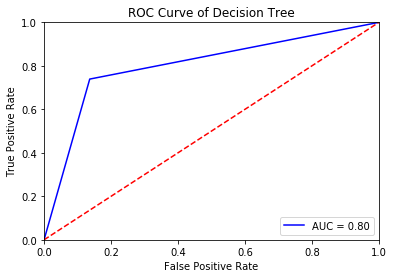

In [70]:
y_scores = dtree.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Decision Tree')
plt.show()

In [71]:
dtree_cross_val = cross_val_score(dtree, X, y, cv=10)
print(dtree_cross_val)

[0.55555556 0.61111111 0.44444444 0.72222222 0.66666667 0.55555556
 0.72222222 0.61111111 0.47058824 0.52941176]


## Logistic Regression

In [72]:
from sklearn.linear_model import LogisticRegression

In [73]:
logmodel = LogisticRegression(solver = 'lbfgs') # L2 or no penalty
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [74]:
y_pred = logmodel.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
logmodel_precision = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
logmodel_recall = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
logmodel_f1 = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]

[[15  7]
 [ 7 16]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68        22
           1       0.70      0.70      0.70        23

    accuracy                           0.69        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.69      0.69      0.69        45



In [75]:
logmodel_cross_val = cross_val_score(logmodel, X, y, cv=10)
print(logmodel_cross_val)

[0.5        0.66666667 0.55555556 0.88888889 0.66666667 0.44444444
 0.66666667 0.83333333 0.52941176 0.52941176]


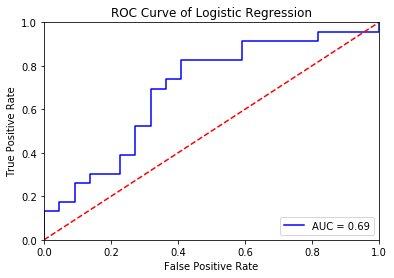

In [76]:
y_scores = logmodel.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Logistic Regression')
plt.show()

## Support Vector Machine Classifier

In [77]:
from sklearn.svm import SVC

In [78]:
svm = SVC(kernel = 'linear', probability=True)
svm.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=True, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [79]:
y_pred = svm.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

svm_precision = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
svm_recall = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
svm_f1 = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]

[[15  7]
 [10 13]]
              precision    recall  f1-score   support

           0       0.60      0.68      0.64        22
           1       0.65      0.57      0.60        23

    accuracy                           0.62        45
   macro avg       0.62      0.62      0.62        45
weighted avg       0.63      0.62      0.62        45



In [80]:
svm_cross_val = cross_val_score(svm, X, y, cv=10)
print(svm_cross_val)

[0.5        0.66666667 0.61111111 0.94444444 0.66666667 0.38888889
 0.66666667 0.83333333 0.58823529 0.47058824]


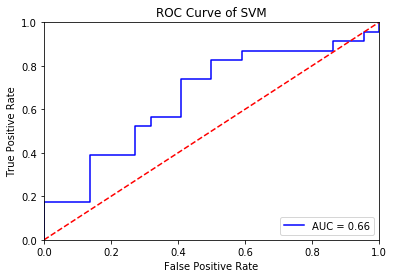

In [81]:
y_scores = svm.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of SVM')
plt.show()

## Gradient Boosting

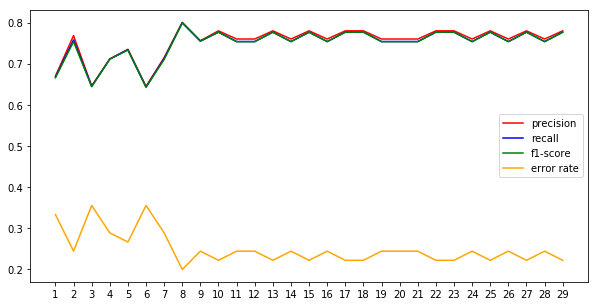

In [82]:
from sklearn import ensemble
xLine = []
precisions = []
recalls = []
fscores = []
errors = []
for k in range(1,30):
    params = {'n_estimators': 500,
          'max_depth': k,
          'loss': 'deviance'}
    esmbBoost = ensemble.GradientBoostingClassifier(**params)
    esmbBoost.fit(X_train,y_train)
    y_pred = esmbBoost.predict(X_test)
    evaluationScores = precision_recall_fscore_support(y_test, y_pred, average='macro')
    
    xLine.append(k)
    precisions.append(evaluationScores[0])
    recalls.append(evaluationScores[1])
    fscores.append(evaluationScores[2])
    errors.append(np.mean(y_pred != y_test))
plt.figure(figsize=(10,5))
sns.lineplot(x = xLine, y = precisions, color = 'r', label='precision')
sns.lineplot(x = xLine, y = recalls, color = 'b', label='recall')
sns.lineplot(x = xLine, y = fscores, color = 'g', label='f1-score')
sns.lineplot(x = xLine, y = errors, color = 'orange', label='error rate')
plt.xticks(xLine)
plt.show()

In [83]:
params = {'n_estimators': 500,
          'max_depth': 8,
          'loss': 'deviance'}
esmbBoost = ensemble.GradientBoostingClassifier(**params)
esmbBoost.fit(X_train,y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=8,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [84]:
y_pred = esmbBoost.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

esmbBoost_precision = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
esmbBoost_recall = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
esmbBoost_f1 = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]

[[18  4]
 [ 4 19]]
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        22
           1       0.83      0.83      0.83        23

    accuracy                           0.82        45
   macro avg       0.82      0.82      0.82        45
weighted avg       0.82      0.82      0.82        45



In [85]:
esmbBoost_cross_val = cross_val_score(esmbBoost, X, y, cv=10)
print(esmbBoost_cross_val)

[0.72222222 0.66666667 0.66666667 0.72222222 0.83333333 0.5
 0.72222222 0.72222222 0.58823529 0.35294118]


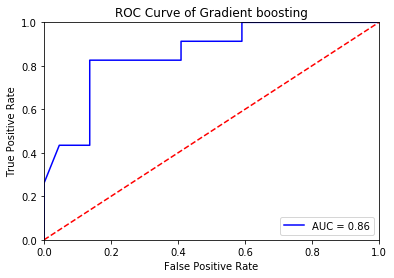

In [86]:
y_scores = esmbBoost.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Gradient boosting')
plt.show()

## Ensemble Random Forest Classification

In [87]:
rfc = ensemble.RandomForestClassifier()
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [88]:
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

rfc_precision = precision_recall_fscore_support(y_test, y_pred, average='macro')[0]
rfc_recall = precision_recall_fscore_support(y_test, y_pred, average='macro')[1]
rfc_f1 = precision_recall_fscore_support(y_test, y_pred, average='macro')[2]

[[19  3]
 [11 12]]
              precision    recall  f1-score   support

           0       0.63      0.86      0.73        22
           1       0.80      0.52      0.63        23

    accuracy                           0.69        45
   macro avg       0.72      0.69      0.68        45
weighted avg       0.72      0.69      0.68        45



In [89]:
rfc_cross_val = cross_val_score(rfc, X, y, cv=10)
print(rfc_cross_val)

[0.55555556 0.66666667 0.61111111 0.77777778 0.72222222 0.5
 0.72222222 0.72222222 0.47058824 0.58823529]


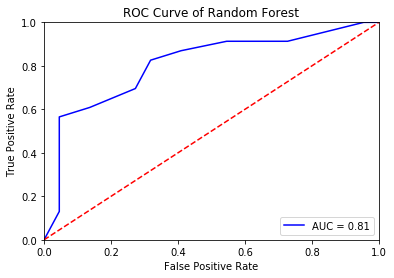

In [90]:
y_scores = rfc.fit(X_train, y_train).predict_proba(X_test)
fpr, tpr, threshold = roc_curve(y_test, y_scores[:, 1])
roc_auc = auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.title('ROC Curve of Random Forest')
plt.show()

# Performance Measures

## Comparison 10-folds Cross Validation Scores (Acuracy)  between Classifiers

In [91]:
df_cross_val = pd.DataFrame()
df_cross_val['Decision Tree'] = dtree_cross_val
df_cross_val['Random Forest'] = rfc_cross_val
df_cross_val['SVM Classifier'] = svm_cross_val
df_cross_val['Gradient Boosting'] = esmbBoost_cross_val
df_cross_val['Logistic Regression'] = logmodel_cross_val
df_cross_val['KNN Classifier'] = knn_cross_val

In [92]:
df_cross_val.describe()

,Decision Tree,Random Forest,SVM Classifier,Gradient Boosting,Logistic Regression,KNN Classifier
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.588889,0.633660,0.633660,0.649673,0.628105,0.594771
std,0.096155,0.104626,0.165552,0.137270,0.145095,0.122422
min,0.444444,0.470588,0.388889,0.352941,0.444444,0.444444
25%,0.535948,0.563725,0.522059,0.607843,0.529412,0.491830
50%,0.583333,0.638889,0.638889,0.694444,0.611111,0.571895
75%,0.652778,0.722222,0.666667,0.722222,0.666667,0.708333
max,0.722222,0.777778,0.944444,0.833333,0.888889,0.777778


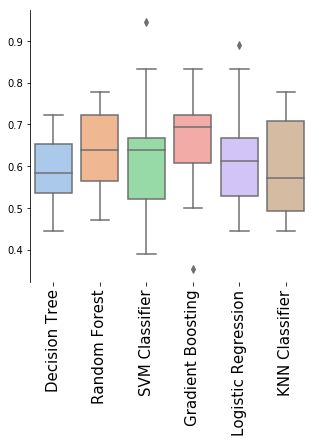

In [93]:
plt.figure(figsize=(5,5))
sns.boxplot(data=df_cross_val, palette='pastel')
plt.xticks(rotation='vertical',fontsize = 15)
sns.despine(bottom=True)
plt.show()

The model with the best accuracy is **Gradient Boosting**. However, the series of scores seem to fluctuate. This means the model has an **overfitting** problem. **Descision Tree** has less overfitting problem, but this model have the lowest average acuracy score.

## Comparison Precision, Recall, and f1-score

In [94]:
df_eval = pd.DataFrame(columns=['model','precision','recall','f1_score'])

In [95]:
df_eval['model'] = 'Decision Tree', 'Random Forest', 'SVM classifier', 'KNN Classifier', 'Gradient Boosting', 'Logistic Regression'
df_eval['precision'] = dtree_precision, rfc_precision, svm_precision, knn_precision, esmbBoost_precision, logmodel_precision
df_eval['recall'] = dtree_recall, rfc_recall, svm_recall, knn_recall, esmbBoost_recall, logmodel_recall
df_eval['f1_score'] = dtree_f1, rfc_f1, svm_f1, knn_f1, esmbBoost_f1, logmodel_f1

In [96]:
df_eval

,model,precision,recall,f1_score
0,Decision Tree,0.805000,0.801383,0.799604
1,Random Forest,0.716667,0.692688,0.681174
2,SVM classifier,0.625000,0.623518,0.621475
3,KNN Classifier,0.783333,0.751976,0.747578
4,Gradient Boosting,0.822134,0.822134,0.822134
5,Logistic Regression,0.688735,0.688735,0.688735


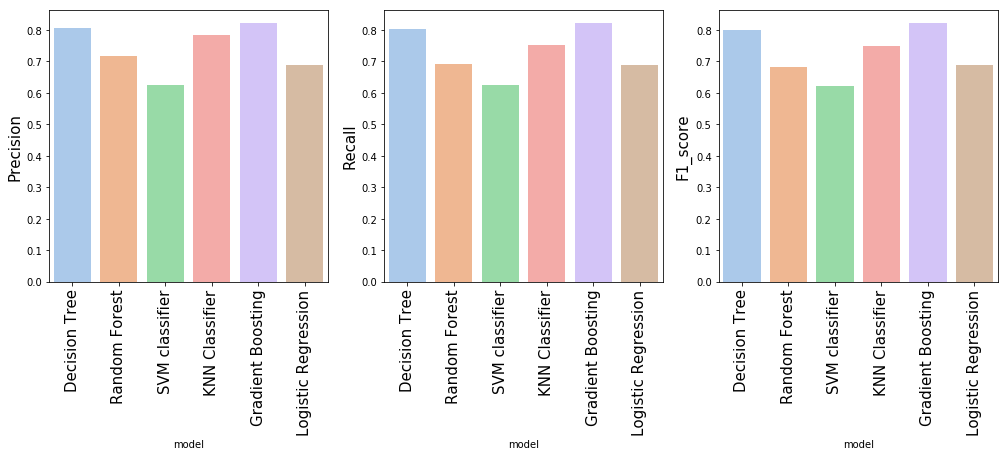

In [97]:
plt.figure(figsize=(17,5))
plt.subplot(1,3,1)
sns.barplot(x = 'model', y = 'precision', data=df_eval, palette='pastel')
plt.xticks(rotation='vertical',fontsize = 15)
plt.ylabel("Precision", fontsize=15)

plt.subplot(1,3,2)
sns.barplot(x = 'model', y = 'recall', data=df_eval, palette='pastel')
plt.xticks(rotation='vertical',fontsize = 15)
plt.ylabel("Recall", fontsize=15)

plt.subplot(1,3,3)
sns.barplot(x = 'model', y = 'f1_score', data=df_eval, palette='pastel')
plt.xticks(rotation='vertical',fontsize = 15)
plt.ylabel("F1_score", fontsize=15)
plt.show()

According to the graphs and tables above, **Decision Tree** has the best performance.

## Summary of Classification Task

According to the model performance above, I selected **Descision Tree**. But there is still the room for improvement regarding accuracy.

Based on the prevalent knowledge of cheminformatics, the effectiveness of inhibitors in the human body very can be affected by the state of solvents such as the water temperature, acidity, and the amount of charged ions in the solvents. In other words, there is a gap between chemical activity and real bioactivity.
To get more accurate results from the data, we need to consider conducting experiments. However, we can roughly select the candidate chemical sets based on this model. 

There are  **96,261,821** chemicals reported by PubChem database. And only 49 kinase inhibitors are approved by the FDA (U.S. Food and Drug Administration).  According to research conducted by Tufts Center for the Study of Drug Development, the cost to develop one new drug is 2.6 billion dolors and approval rate for drugs entering clinical development is less than 12% [1]. 

Screening and suggesting candidate chemicals based on the chemical properties can be valuable considering before starting experiments in terms of saving the cost.

# Network Analysis of All Kinases

We will define whether the inhibition-driven links between kinases will cause the kinases to cluster by kinase groups based on genetic similarity.  In other words, We will explore whether kinases which are having similar genetic background are targeted by similar inhibitor sets.

## Obtain Active Flags

Generally, if the activation value of kinase inhibited by a molecule is less than 25, it is considered that the kinase is inhibited.

Let's get active flags for the analysis.

In [98]:
df_metric = pd.read_csv("kinase_drug_activity.csv", index_col = 0)
colList = list(df_metric.columns)

In [99]:
colList.remove('Kinase')
colList.remove('Kinase_official')
colList.remove('Kinase_group')

In [100]:
def getActive(value):
    if value < 10 :
        return(1) # Inhibited: 1
    else :
        return(0) # Not Inhibited: 0

In [101]:
for col in colList:
    df_metric[col] = df_metric[col].apply(getActive)

In [102]:
df_metric.head()

,Kinase,Kinase_official,Kinase_group,5278396,6605258,2044,9817165,5719375,65399,135398501,...,10113978,160355,216239,5329102,3038522,9926791,5494449,3081361,151194,10341154
1,ABL1,ABL1,TK,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ABL2/ARG,ABL2,TK,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,ACK1,TNK2,TK,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,AKT1,AKT1,AGC,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,AKT2,AKT2,AGC,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [103]:
df_kinase = df_metric.drop(['Kinase','Kinase_group'], axis = 1)
df_kinase = df_kinase.set_index('Kinase_official')
df_kinase = df_kinase.transpose()

In [104]:
df_kinase.head()

Kinase_official,ABL1,ABL2,TNK2,AKT1,AKT2,AKT3,ALK,ACVRL1,ACVR1,ACVR1B,...,ULK2,ULK3,VRK1,WEE1,WNK2,WNK3,YES1,ZAK,ZAP70,DAPK3
5278396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6605258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9817165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5719375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Generate Network

We measure the **weights** of each network between kinases by counts **how many effective inhibitors they shared**. 

In [105]:
tuples = []
for i, kinase1 in enumerate(df_kinase.columns):
    for j, kinase2 in enumerate(df_kinase.columns):
        if i > j:
            if df_kinase[(df_kinase[kinase1] == 1) & (df_kinase[kinase2] == 1)].shape[0] > 0 :
                temp = (kinase1,kinase2,{"weight":df_kinase[(df_kinase[kinase1] == 1) & (df_kinase[kinase2] == 1)].shape[0]})
                tuples.append(temp)

In [106]:
import networkx as nx
kinases=nx.Graph()

# Adding edges will automatically add nodes.
kinases.add_edges_from(tuples)

In [107]:
# Adding additional information of nodes.
nodes = df_metric[['Kinase_official','Kinase_group']]

# Adding attributes to the nodes in the graph.
for node in nodes['Kinase_official']:
    if node in kinases.nodes():
        kinases.node[node]['class'] = nodes.loc[nodes['Kinase_official']==node,'Kinase_group'].values[0]

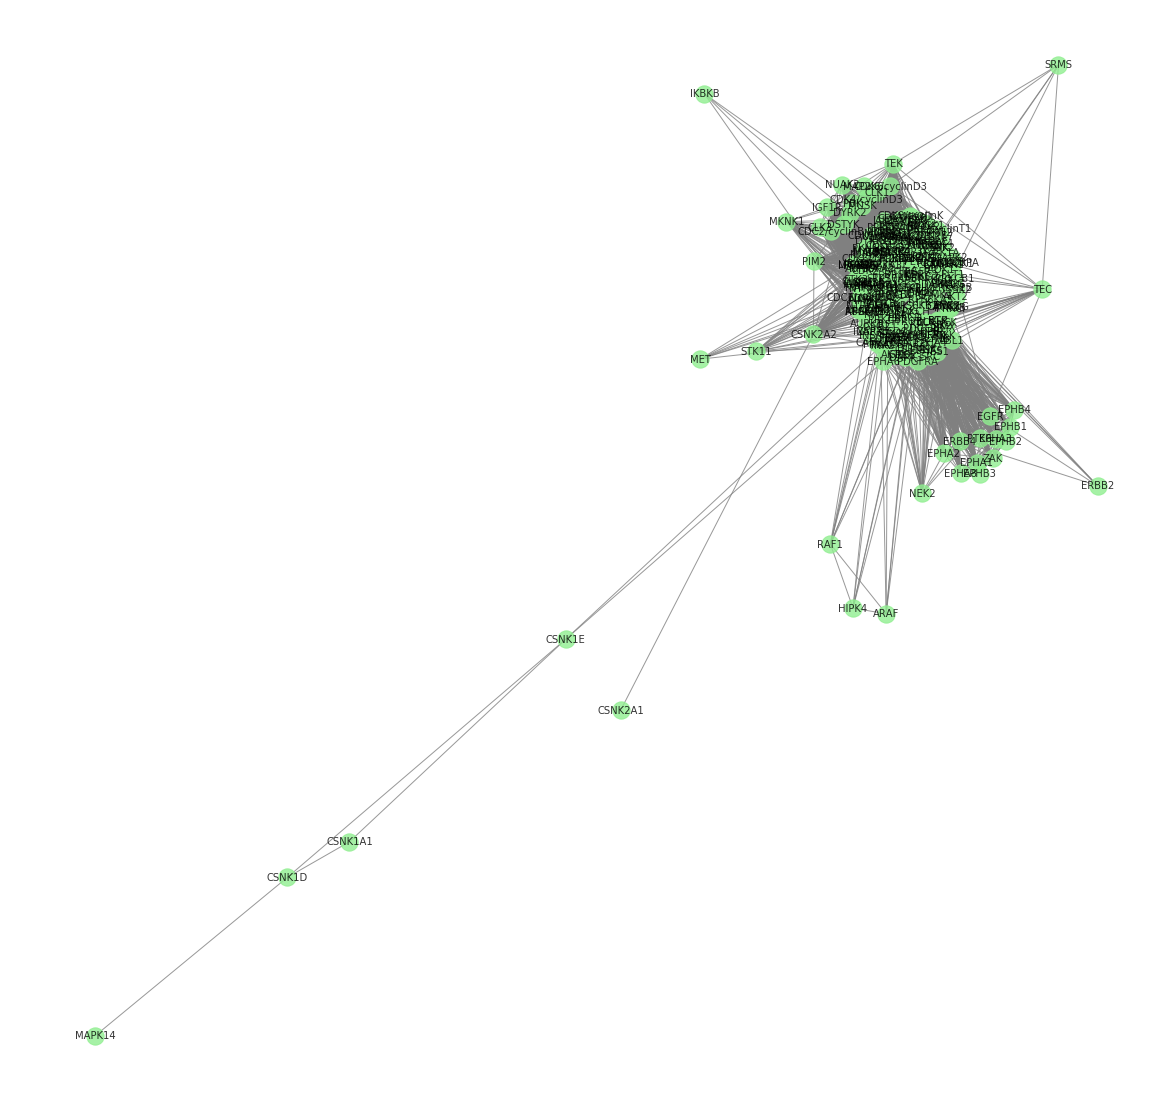

In [108]:
plt.rcParams['figure.figsize']=[20,20]
nx.draw_networkx(kinases,
                 pos=nx.spring_layout(kinases,weight='weights'), 
                 node_color='lightgreen',
                 edge_color='gray',
                 node_size=300,
                 with_labels=True,
                 font_size=10,
                 alpha=.8
                 )
plt.axis('off')
plt.show()

This graph has 235 nodes and 20209 edges.
The median degree is 198.0 and the mean degree is 171.99148936170212.
A kinase node with median degree is connected to 84.25531914893617% of other kinase.
There are 1 connected components within the graph.


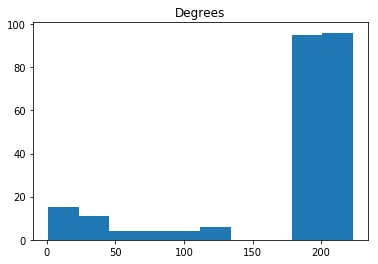

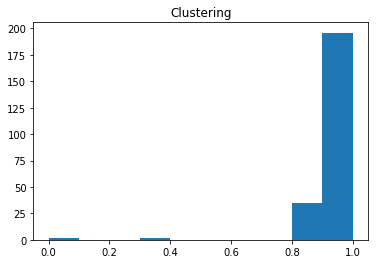

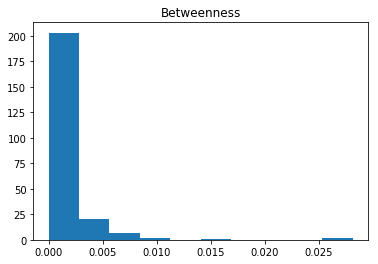

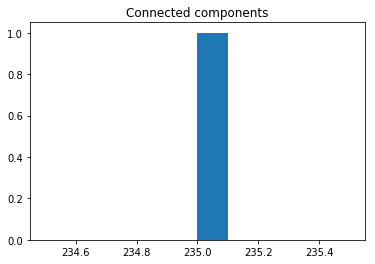

In [109]:
numberofnodes=kinases.number_of_nodes()
nodedegrees=list(dict(kinases.degree).values())
av_degree=np.mean(nodedegrees)
med_degree=np.median(nodedegrees)
clustering=list(nx.clustering(kinases).values())
betweenness_cent=list(nx.betweenness_centrality(kinases).values())
componentsizes=[len(c) for c in sorted(
    nx.connected_components(kinases), key=len, reverse=True)]

print("This graph has {} nodes and {} edges.".format(
    kinases.number_of_nodes(),kinases.number_of_edges()))

print("The median degree is {} and the mean degree is {}.".format(med_degree,av_degree))

print("A kinase node with median degree is connected to {}% of other kinase.".format(
    (med_degree/numberofnodes)*100))

print("There are {} connected components within the graph.".format(
    nx.number_connected_components(kinases)))

plt.rcParams['figure.figsize']=[6,4]

plt.hist(nodedegrees)
plt.title('Degrees')
plt.show()

plt.hist(clustering)
plt.title('Clustering')
plt.show()

plt.hist(betweenness_cent)
plt.title('Betweenness')
plt.show()

plt.hist(componentsizes)
plt.title('Connected components')
plt.show()

In [110]:
# Pulling our node-level statistics together into a dataframe.
graph_stats=pd.DataFrame({'node':list(dict(kinases.degree()).keys()),
                          'degree':list(dict(kinases.degree()).values()),
                          'clustering':list(nx.clustering(kinases).values()),
                          'betweenness_cent':list(
                              nx.betweenness_centrality(kinases).values())
                         })

# Assigning each node to a component by number.
graph_stats['component']=None

# Sorting the components by size so that the largest component will be numbered 0.
components=sorted(nx.connected_components(kinases), key=len, reverse=True)
for i,component in enumerate(components):
    graph_stats.loc[graph_stats['node'].isin(list(component)),'component']=i
    
print(graph_stats.head())
    

   node  degree  clustering  betweenness_cent  component
0  ABL2     204    0.891336          0.003075          0
1  ABL1     119    0.816978          0.002274          0
2  TNK2     223    0.804266          0.028144          0
3  AKT1     190    1.000000          0.000000          0
4  AKT2     190    1.000000          0.000000          0


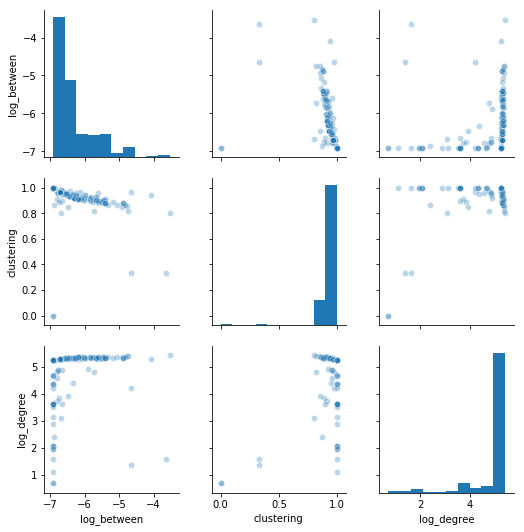

In [111]:
# Logging these two for easier relationship viewing.
graph_stats['log_between']=np.log(graph_stats['betweenness_cent']+.001)
graph_stats['log_degree']=np.log(graph_stats['degree']+1)

g = sns.pairplot(graph_stats,
                 vars=['log_between','clustering','log_degree'],
                 kind='scatter',
                plot_kws={'alpha':.3})
plt.show()

## Statistics of Network

As shown in the degree histogram, most nodes are connected to many other nodes, though the degrees are skewed into the left side. In the clustering histogram, we can see most of the kinases cluster very tightly (> 0.75).

Though this network seems highly connected, betweenness centrality scores are low overall. Moreover, we can see only 1 connected component in the network.

In [112]:
# Merging our statistics with the original node information.
kinases_stats=pd.merge(graph_stats,nodes,left_on='node',right_on='Kinase_official',how='inner')

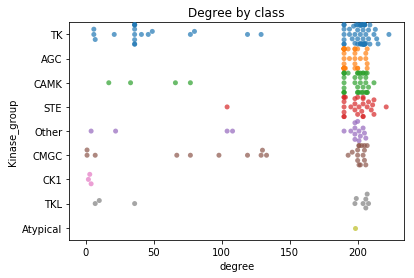

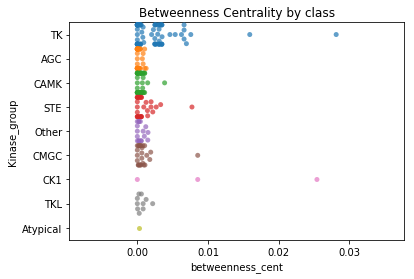

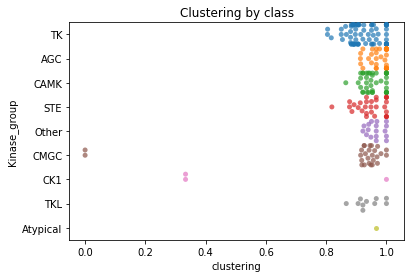

In [113]:
# Plotting node stats by class

sns.swarmplot(x="degree", y="Kinase_group", data=kinases_stats,alpha=.7)
plt.title('Degree by class')
plt.show()

sns.swarmplot(x="betweenness_cent", y="Kinase_group", data=kinases_stats,alpha=.7)
plt.title('Betweenness Centrality by class')
plt.show()

sns.swarmplot(x="clustering", y="Kinase_group", data=kinases_stats,alpha=.7)
plt.title('Clustering by class')
plt.show()

## Classes and node characteristics
Most of the kinases have high degrees. 
 This suggests that most of the kinases tend to share the many inhibitors targeting them regardless of which group they belong to. Because we used the kinase inhibitors in this analysis, the results are not surprising. However, what we should notice is that many inhibitors are targeting multiple kinases.

Betweenness centralities are low. None of the kinase groups seem particularly likely to have nodes with high betweenness centrality.

Clustering seems to be all kinases are clustered together.



In [114]:
print('The number of nodes in each class:')
nodesbyclass=kinases_stats.groupby(by='Kinase_group')['component'].count()
print(nodesbyclass)

print('\nThe number of connected components that members of each class belong to.')
componentsbyclass=kinases_stats.groupby(by='Kinase_group')['component'].apply(
    lambda x: len(set(x)))
print(componentsbyclass)

#A class with more nodes has more opportunities to belong to multiple components, so we'll divide by number of nodes.
print("\nNumber of components by class normalized by number of nodes.")
print(componentsbyclass/nodesbyclass)

The number of nodes in each class:
Kinase_group
AGC         37
Atypical     1
CAMK        40
CK1          3
CMGC        26
Other       17
STE         29
TK          72
TKL         10
Name: component, dtype: int64

The number of connected components that members of each class belong to.
Kinase_group
AGC         1
Atypical    1
CAMK        1
CK1         1
CMGC        1
Other       1
STE         1
TK          1
TKL         1
Name: component, dtype: int64

Number of components by class normalized by number of nodes.
Kinase_group
AGC         0.027027
Atypical    1.000000
CAMK        0.025000
CK1         0.333333
CMGC        0.038462
Other       0.058824
STE         0.034483
TK          0.013889
TKL         0.100000
Name: component, dtype: float64


# Network Analysis of All Kinases (Colored by Kinase Group)

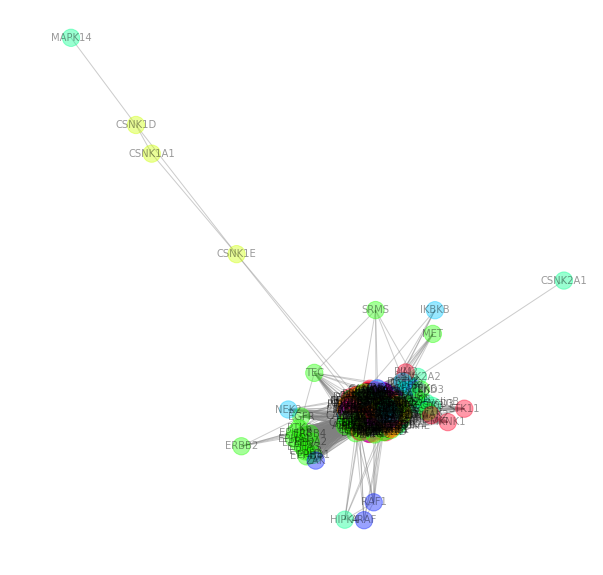

In [115]:
import matplotlib.cm as cm
import matplotlib.colors as colors

# Getting a list of all the nodes' classes, in order
classlist=list(nx.get_node_attributes(kinases,'class').values())

#Creating a dictionary associating each class with a unique integer.
classes=set(classlist)
dictionary=dict(zip(classes,range(len(classes))))

#Creating a list of integers corresponding to classes to use for color assignment.
classcolors=[dictionary[x] for x in classlist]

plt.rcParams['figure.figsize']=[10,10]
        
nx.draw_networkx(kinases,
                 pos=nx.spring_layout(kinases,weight='weights'), 
                 cmap=plt.get_cmap('gist_rainbow'), 
                 node_color=classcolors,
                 edge_color='gray',
                 node_size=300,
                 with_labels=True,
                 font_size=10,
                 alpha=.4
                 )
plt.axis('off')

plt.show()

## Sumamry

From the network graphs above, we can see most kinases are in-network and the few of kinase sub-clusters are a little bit separated.

EPH receptor kinases (EPHXXs) and Epidermal growth factor receptor family (EGFR, ERBB2, ERBB4, RAF1, ARAF, etc) seem clustered together and they located close to each other. The distance between kinases in the graph means that the network weight, in other words, how many inhibitors they are sharing.

Also, we can observe tyrosine kinase (TK) group and tyrosine kinase-like (TKL) group are slightly clustered together than others.

# Network Analysis of Tyrosine Kinases (TK) and Tyrosine Kinases Like (TKL)

In [116]:
df_TK = df_metric[(df_metric['Kinase_group'] =='TK') | (df_metric['Kinase_group'] =='TKL')]
df_TK = df_TK.drop(['Kinase','Kinase_group'], axis = 1)
df_TK = df_TK.set_index('Kinase_official')
df_TK = df_TK.transpose()
df_TK.head()

Kinase_official,ABL1,ABL2,TNK2,ALK,ACVRL1,ACVR1,ACVR1B,TGFBR1,ARAF,AXL,...,NTRK1,NTRK2,NTRK3,TXK,LTK,TYK2,TYRO3,YES1,ZAK,ZAP70
5278396,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6605258,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2044,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9817165,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5719375,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [117]:
tuples = []
for kinase1 in df_TK.columns:
    for kinase2 in df_TK.columns:
        if kinase1 != kinase2:
            if df_kinase[(df_TK[kinase1] == 1) & (df_TK[kinase2] == 1)].shape[0] > 0 :
                temp = (kinase1,kinase2,{"weight":df_TK[(df_TK[kinase1] == 1) & (df_TK[kinase2] == 1)].shape[0]})
            
                tuples.append(temp)

In [118]:
nodes = df_metric[(df_metric['Kinase_group'] =='TK') | (df_metric['Kinase_group'] =='TKL')][['Kinase_official','Kinase_group']]
nodes.head()

,Kinase_official,Kinase_group
1,ABL1,TK
2,ABL2,TK
3,TNK2,TK
7,ALK,TK
8,ACVRL1,TKL


In [119]:
tyrosine=nx.Graph()

# Adding edges will automatically add nodes.
tyrosine.add_edges_from(tuples)

In [120]:
# Adding attributes to the nodes in the graph.
for node in nodes['Kinase_official']:
    if node in tyrosine.nodes():
        tyrosine.node[node]['class'] = nodes.loc[nodes['Kinase_official']==node,'Kinase_group'].values[0]

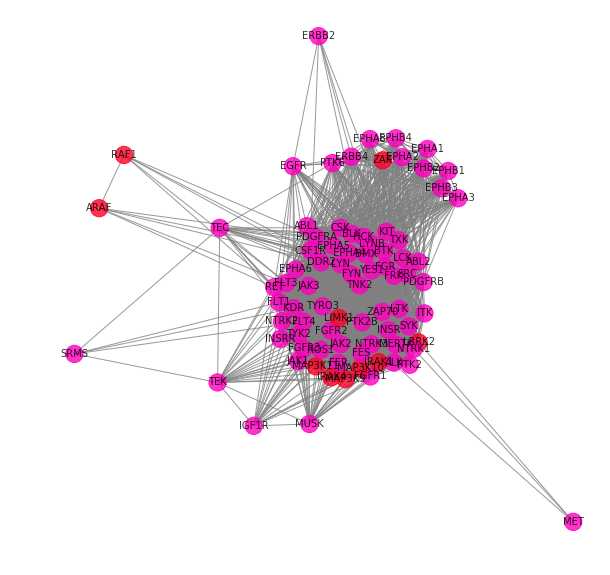

In [121]:
# Getting a list of all the nodes' c0lasses, in order
classlist=list(nx.get_node_attributes(tyrosine,'class').values())

#Creating a dictionary associating each class with a unique integer.
classes=set(classlist)
dictionary=dict(zip(classes,range(len(classes))))

#Creating a list of integers corresponding to classes to use for color assignment.
classcolors=[dictionary[x] for x in classlist]

plt.rcParams['figure.figsize']=[10,10]
        
nx.draw_networkx(tyrosine,
                 pos=nx.spring_layout(tyrosine,weight='weights'), 
                 cmap=plt.get_cmap('gist_rainbow'), 
                 node_color=classcolors,
                 edge_color='gray',
                 node_size=300,
                 with_labels=True,
                 font_size=10,
                 alpha=.8
                 )
plt.axis('off')

plt.show()

## Summary of Network Analysis

According to this graph, the kinases have similar genetic components. They tend to be targeted by similar inhibitor sets. This trend gives a simple outline to select candidate inhibitors when the target genes already selected in the experiment.